# Supervised Learning - Foundations Project: ReCell

## Problem Statement

### Business Context

Buying and selling used phones and tablets used to be something that happened on a handful of online marketplace sites. But the used and refurbished device market has grown considerably over the past decade, and a new IDC (International Data Corporation) forecast predicts that the used phone market would be worth \\$52.7bn by 2023 with a compound annual growth rate (CAGR) of 13.6% from 2018 to 2023. This growth can be attributed to an uptick in demand for used phones and tablets that offer considerable savings compared with new models.

Refurbished and used devices continue to provide cost-effective alternatives to both consumers and businesses that are looking to save money when purchasing one. There are plenty of other benefits associated with the used device market. Used and refurbished devices can be sold with warranties and can also be insured with proof of purchase. Third-party vendors/platforms, such as Verizon, Amazon, etc., provide attractive offers to customers for refurbished devices. Maximizing the longevity of devices through second-hand trade also reduces their environmental impact and helps in recycling and reducing waste. The impact of the COVID-19 outbreak may further boost this segment as consumers cut back on discretionary spending and buy phones and tablets only for immediate needs.


### Objective

The rising potential of this comparatively under-the-radar market fuels the need for an ML-based solution to develop a dynamic pricing strategy for used and refurbished devices. ReCell, a startup aiming to tap the potential in this market, has hired you as a data scientist. They want you to analyze the data provided and build a linear regression model to predict the price of a used phone/tablet and identify factors that significantly influence it.


### Data Description

The data contains the different attributes of used/refurbished phones and tablets. The data was collected in the year 2021. The detailed data dictionary is given below.


- brand_name: Name of manufacturing brand
- os: OS on which the device runs
- screen_size: Size of the screen in cm
- 4g: Whether 4G is available or not
- 5g: Whether 5G is available or not
- main_camera_mp: Resolution of the rear camera in megapixels
- selfie_camera_mp: Resolution of the front camera in megapixels
- int_memory: Amount of internal memory (ROM) in GB
- ram: Amount of RAM in GB
- battery: Energy capacity of the device battery in mAh
- weight: Weight of the device in grams
- release_year: Year when the device model was released
- days_used: Number of days the used/refurbished device has been used
- normalized_new_price: Normalized price of a new device of the same model in euros
- normalized_used_price: Normalized price of the used/refurbished device in euros

## Importing necessary libraries

In [ ]:
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

# split the data into train and test
from sklearn.model_selection import train_test_split

# to build linear regression_model
import statsmodels.api as sm

# to check model performance
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [1]:
# Installing the libraries with the specified version.
# uncomment and run the following line if Google Colab is being used
#!pip install scikit-learn==1.2.2 seaborn==0.13.1 matplotlib==3.7.1 numpy==1.25.2 pandas==1.5.3 -q --user

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Loading the dataset

In [ ]:
data= pd.read_csv('/content/drive/MyDrive/Colab Notebooks/used_device_data.csv')

## Data Overview

- Observations
- Sanity checks

In [ ]:
data.head()

brand_name       os  screen_size   4g   5g  main_camera_mp  \
0      Honor  Android        14.50  yes   no            13.0   
1      Honor  Android        17.30  yes  yes            13.0   
2      Honor  Android        16.69  yes  yes            13.0   
3      Honor  Android        25.50  yes  yes            13.0   
4      Honor  Android        15.32  yes   no            13.0   

   selfie_camera_mp  int_memory  ram  battery  weight  release_year  \
0               5.0        64.0  3.0   3020.0   146.0          2020   
1              16.0       128.0  8.0   4300.0   213.0          2020   
2               8.0       128.0  8.0   4200.0   213.0          2020   
3               8.0        64.0  6.0   7250.0   480.0          2020   
4               8.0        64.0  3.0   5000.0   185.0          2020   

   days_used  normalized_used_price  normalized_new_price  
0        127               4.307572              4.715100  
1        325               5.162097              5.519018  
2        162               5.111084              5.884631  
3        345               5.135387              5.630961  
4        293               4.389995              4.947837

In [ ]:
data.shape

(3454, 15)

* There are 3454 rows and 15 columns.

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3454 entries, 0 to 3453
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   brand_name             3454 non-null   object 
 1   os                     3454 non-null   object 
 2   screen_size            3454 non-null   float64
 3   4g                     3454 non-null   object 
 4   5g                     3454 non-null   object 
 5   main_camera_mp         3275 non-null   float64
 6   selfie_camera_mp       3452 non-null   float64
 7   int_memory             3450 non-null   float64
 8   ram                    3450 non-null   float64
 9   battery                3448 non-null   float64
 10  weight                 3447 non-null   float64
 11  release_year           3454 non-null   int64  
 12  days_used              3454 non-null   int64  
 13  normalized_used_price  3454 non-null   float64
 14  normalized_new_price   3454 non-null   float64
dtypes: f

* Brand name, Operating system, 4g and 5g are objects, Others are float and integers which is good.

In [ ]:
data.describe().T

count         mean          std          min  \
screen_size            3454.0    13.713115     3.805280     5.080000   
main_camera_mp         3275.0     9.460208     4.815461     0.080000   
selfie_camera_mp       3452.0     6.554229     6.970372     0.000000   
int_memory             3450.0    54.573099    84.972371     0.010000   
ram                    3450.0     4.036122     1.365105     0.020000   
battery                3448.0  3133.402697  1299.682844   500.000000   
weight                 3447.0   182.751871    88.413228    69.000000   
release_year           3454.0  2015.965258     2.298455  2013.000000   
days_used              3454.0   674.869716   248.580166    91.000000   
normalized_used_price  3454.0     4.364712     0.588914     1.536867   
normalized_new_price   3454.0     5.233107     0.683637     2.901422   

                               25%          50%          75%          max  
screen_size              12.700000    12.830000    15.340000    30.710000  
main_camera_mp            5.000000     8.000000    13.000000    48.000000  
selfie_camera_mp          2.000000     5.000000     8.000000    32.000000  
int_memory               16.000000    32.000000    64.000000  1024.000000  
ram                       4.000000     4.000000     4.000000    12.000000  
battery                2100.000000  3000.000000  4000.000000  9720.000000  
weight                  142.000000   160.000000   185.000000   855.000000  
release_year           2014.000000  2015.500000  2018.000000  2020.000000  
days_used               533.500000   690.500000   868.750000  1094.000000  
normalized_used_price     4.033931     4.405133     4.755700     6.619433  
normalized_new_price      4.790342     5.245892     5.673718     7.847841

* Average screen size is 13.73cm, and maximum screen size is 30.71cm.
* The minimum main camera resolution is 0.08 MP, which is very small.
* The average weight of cell phone is 182.75 grams and maximum weight is 855 gram.
* The average normalized used phone price is 4.36 euros while for the new phone is 5.23 euros.

In [ ]:
data.describe(include="object").T

count unique      top  freq
brand_name  3454     34   Others   502
os          3454      4  Android  3214
4g          3454      2      yes  2335
5g          3454      2       no  3302

* There are 34 types of unique brand cell phones.
* Most of the phone's operating system is Android.

In [ ]:
data.duplicated().sum()


np.int64(0)

* There is no duplicate values in the data.

In [ ]:
data.isnull().sum()

brand_name                 0
os                         0
screen_size                0
4g                         0
5g                         0
main_camera_mp           179
selfie_camera_mp           2
int_memory                 4
ram                        4
battery                    6
weight                     7
release_year               0
days_used                  0
normalized_used_price      0
normalized_new_price       0
dtype: int64

* There are some missing values in the data which can be impute after EDA.

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**:

1. What does the distribution of normalized used device prices look like?
2. What percentage of the used device market is dominated by Android devices?
3. The amount of RAM is important for the smooth functioning of a device. How does the amount of RAM vary with the brand?
4. A large battery often increases a device's weight, making it feel uncomfortable in the hands. How does the weight vary for phones and tablets offering large batteries (more than 4500 mAh)?
5. Bigger screens are desirable for entertainment purposes as they offer a better viewing experience. How many phones and tablets are available across different brands with a screen size larger than 6 inches?
6. A lot of devices nowadays offer great selfie cameras, allowing us to capture our favorite moments with loved ones. What is the distribution of devices offering greater than 8MP selfie cameras across brands?
7. Which attributes are highly correlated with the normalized price of a used device?

In [ ]:
# Creating function to graph histogram and boxplot on same page
def histogram_boxplot(data, feature, figsize=(10, 7), kde=False, bins=None):

    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [ ]:
# function to create labeled barplots

def labeled_barplot(data, feature, perc=False, n=None):
    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        hue=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

# Screen Size

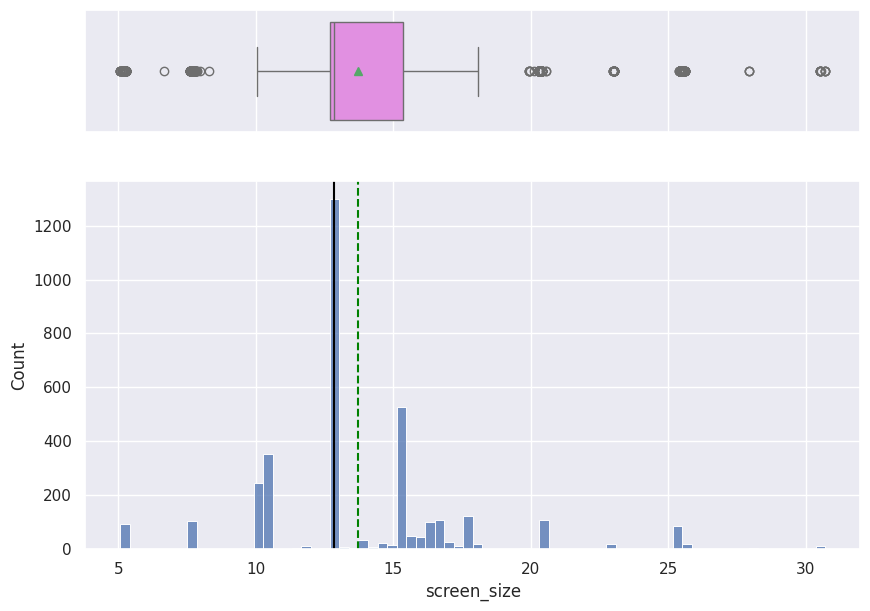

In [ ]:
histogram_boxplot(data, "screen_size")

**Observation**
* The median screen size is about 12.5cm and mean size is little higher than median so the data is little right skewed.
* Some of the screen size is higher than 20cm that could be a tablet
* There are outliers in the data.

# Main Camera

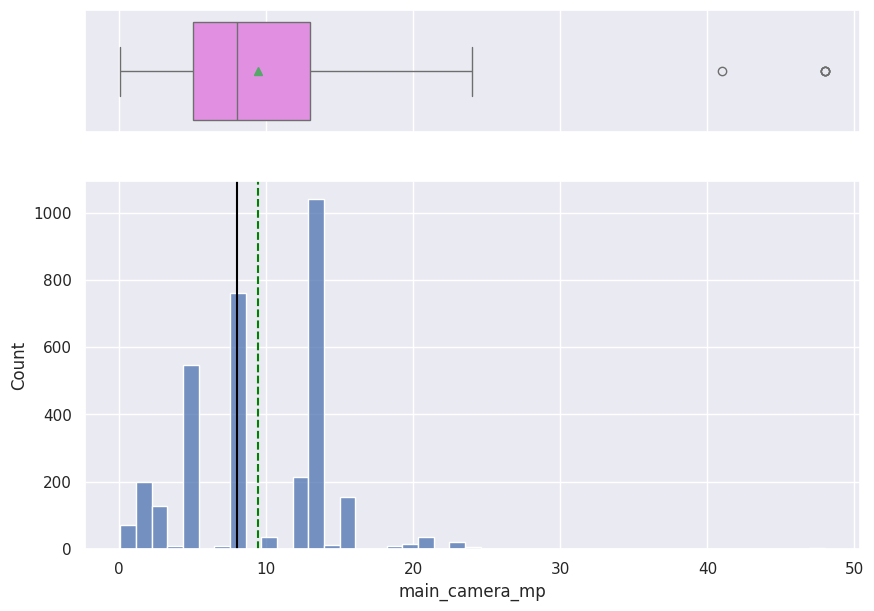

In [ ]:
histogram_boxplot(data, "main_camera_mp")

**Observation**
* The median rear camera is about 8 MP and mean size is about 9 MP little higher than median so the data is little right skewed.
* The mode is about 13 MP so in the data most of the phones has 13 MP camera.
* Some cell phone has above 40 MP camera which can be true.

# Selfie Camera

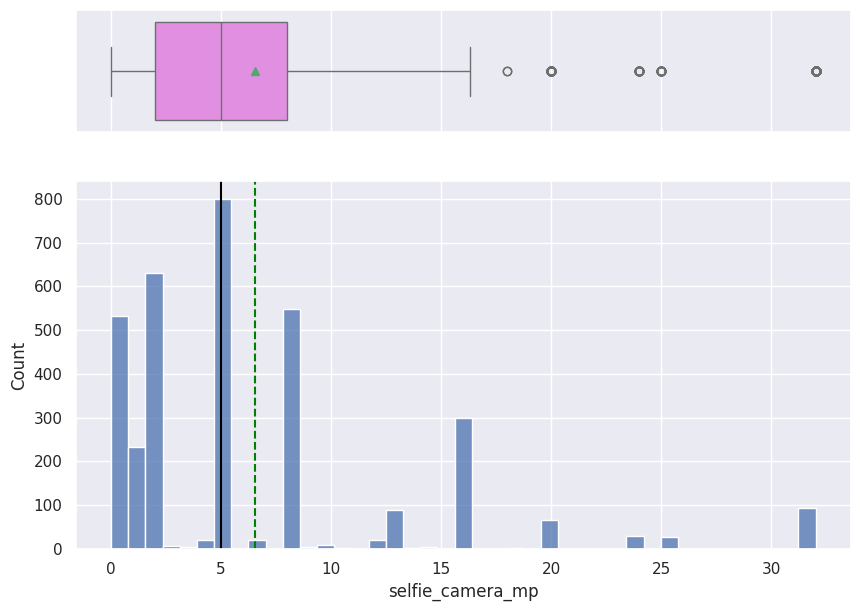

In [ ]:
histogram_boxplot(data, "selfie_camera_mp")

**Observation**
* The median selfie camera is about 5 MP and mean size is about 6.5 MP little higher than median so the data is little right skewed.
* Some cell phone has above 20 MP front camera which can be true.

# Internal Memory

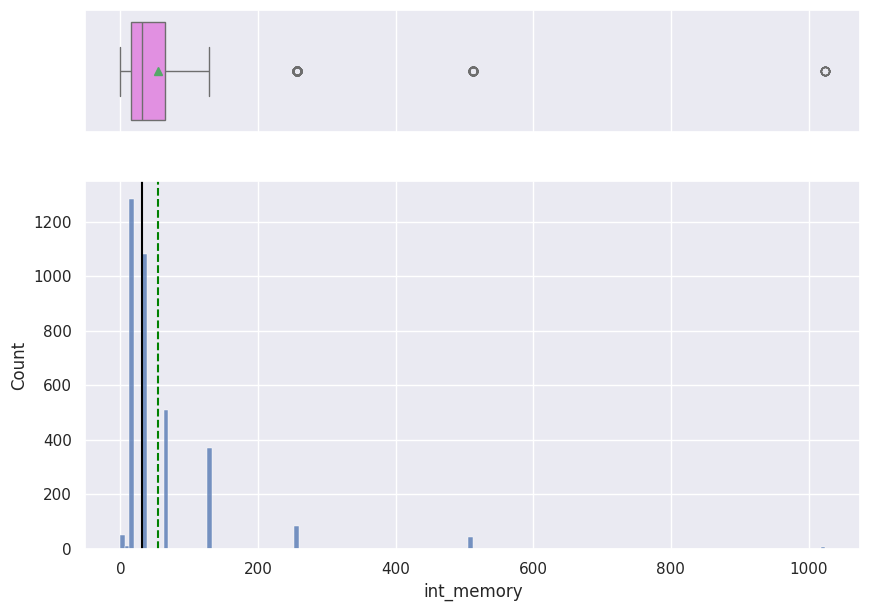

In [ ]:
histogram_boxplot(data, "int_memory")

**Observation**
* The median internal memory is about 32 GB and mean size is about little higher than median so the data is little right skewed.
* Some cell phone has above 200 Gb memory which can be true.

# RAM

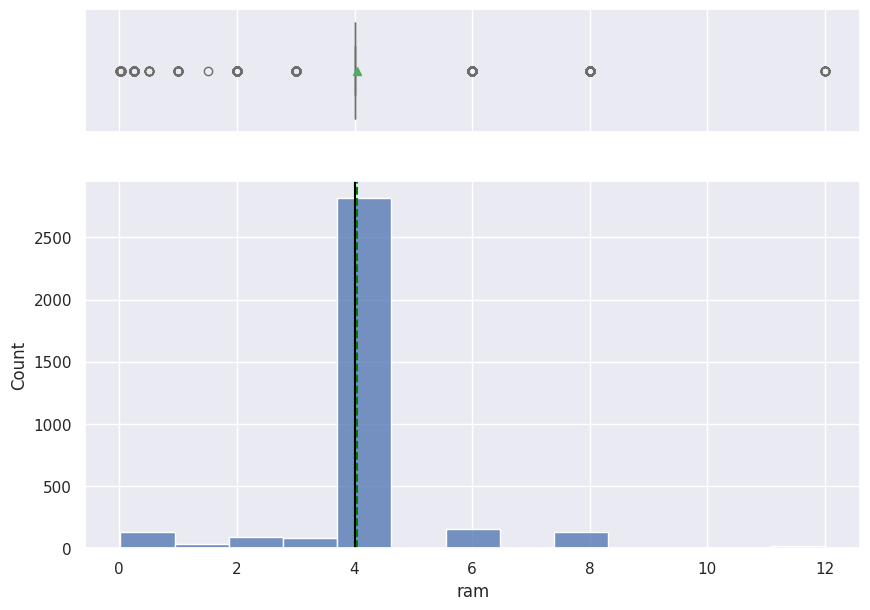

In [ ]:
histogram_boxplot(data, "ram")

**Observation**
* The median and mean of RAM of cellphone  is about 4 GB and there is not that much variation in the data.
* There are some outliers in the data but that can be a true RAM size.

# Battery

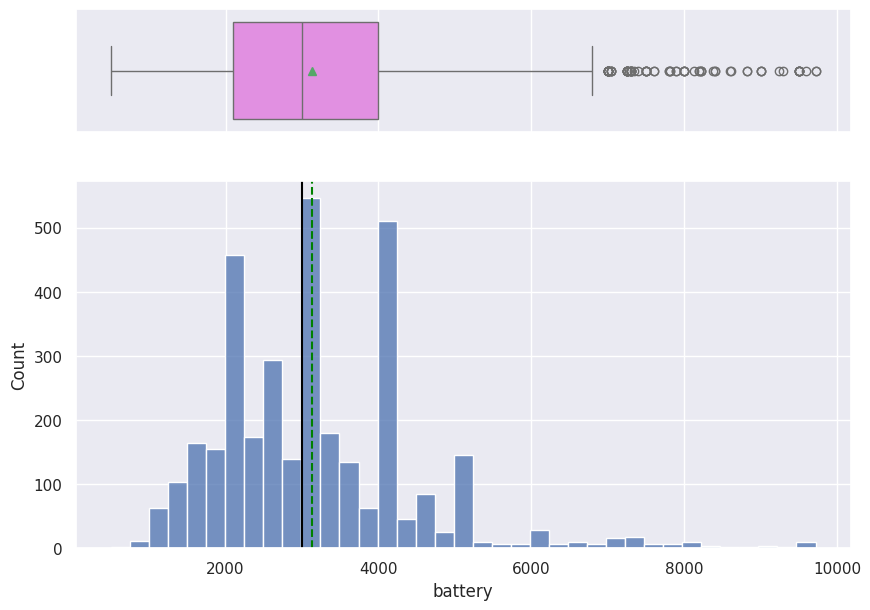

In [ ]:
histogram_boxplot(data, "battery")

**Observation**
* The median and mean of battery capacity of cellphone is about 3000 mAh.
* Some cell phone has above 6000 mAh capacity which seems not to be true.


# Weight

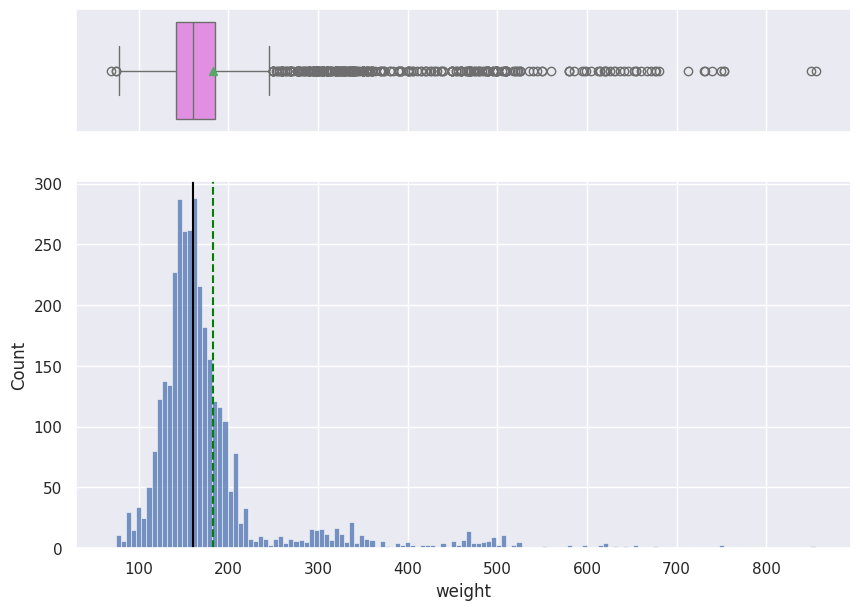

In [ ]:
histogram_boxplot(data, "weight")

**Observation**
* The median weight of cell phone is 160 gram and mean weight of cellphone little higher so data is right skewed.
* There are so many outliers on the right side of the data.
* The weight of cell phone higher than 300 gram seems not to be true, it can be a tablet.

# Release Year

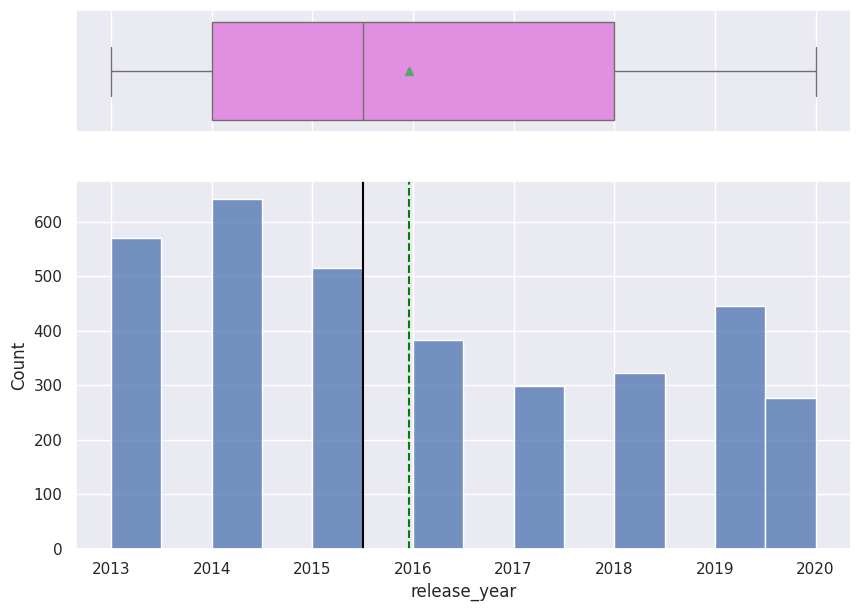

In [ ]:
histogram_boxplot(data, "release_year")

**Observation**
* The median release year and mean release year of cell phone is between 2015 to 2016.
* There are no outliers in the data.

# Days Used

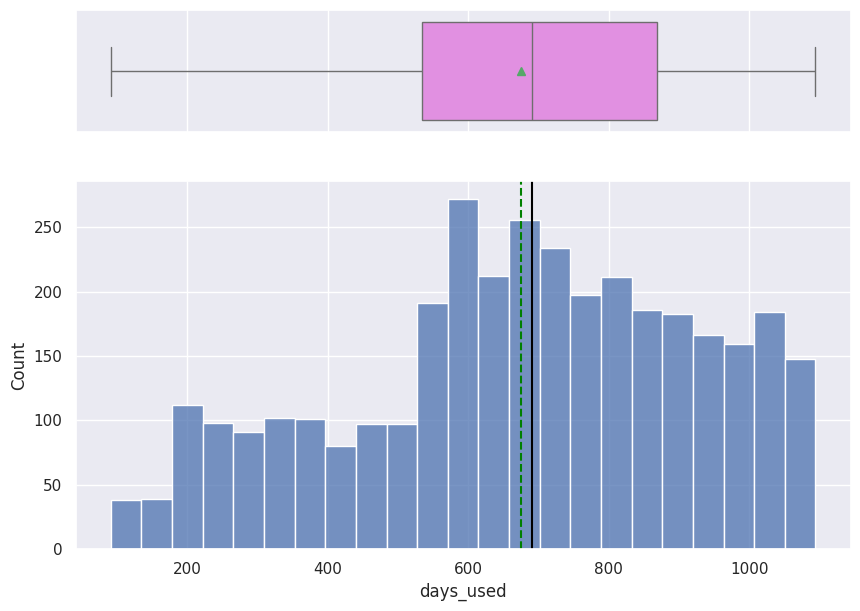

In [ ]:
histogram_boxplot(data, "days_used")

**Observation**
* The median days used and mean days used of cell phone is between 650 and 700 days.
* There are no outliers in the data.
* the data is little left skewed.

# Normalized Used Price

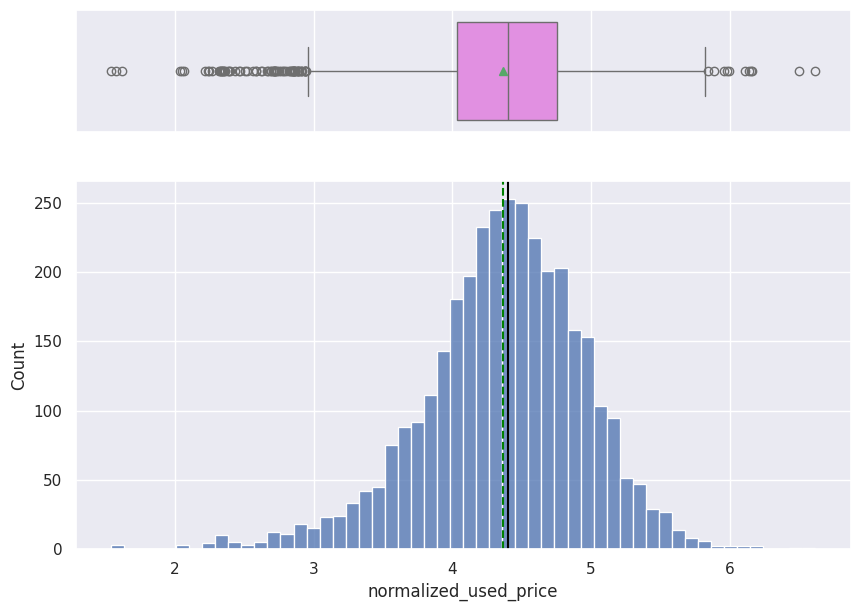

In [ ]:
histogram_boxplot(data, "normalized_used_price")

**Observation**
* The median normalized price and mean normalized price of used cell phone is about 4 euros.
* There are outliers in both side of the data.
* the data looks normally distributed on both side.

# Normalized New Price

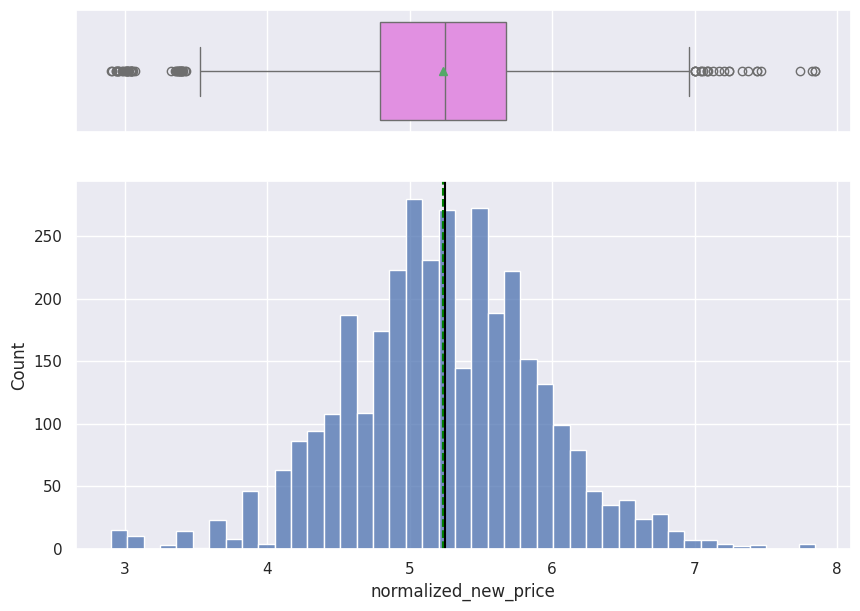

In [ ]:
histogram_boxplot(data, "normalized_new_price")

**Observation**
* The median normalized price and mean normalized price of new cell phone is about 5 euros.
* There are outliers in both side of the data.
* the data looks normally distributed on both side.

# Brand Name

In [ ]:
data['brand_name'].unique()

array(['Honor', 'Others', 'HTC', 'Huawei', 'Infinix', 'Lava', 'Lenovo',
       'LG', 'Meizu', 'Micromax', 'Motorola', 'Nokia', 'OnePlus', 'Oppo',
       'Realme', 'Samsung', 'Vivo', 'Xiaomi', 'ZTE', 'Apple', 'Asus',
       'Coolpad', 'Acer', 'Alcatel', 'BlackBerry', 'Celkon', 'Gionee',
       'Google', 'Karbonn', 'Microsoft', 'Panasonic', 'Sony', 'Spice',
       'XOLO'], dtype=object)

In [ ]:
data['brand_name'].unique().shape[0]

34

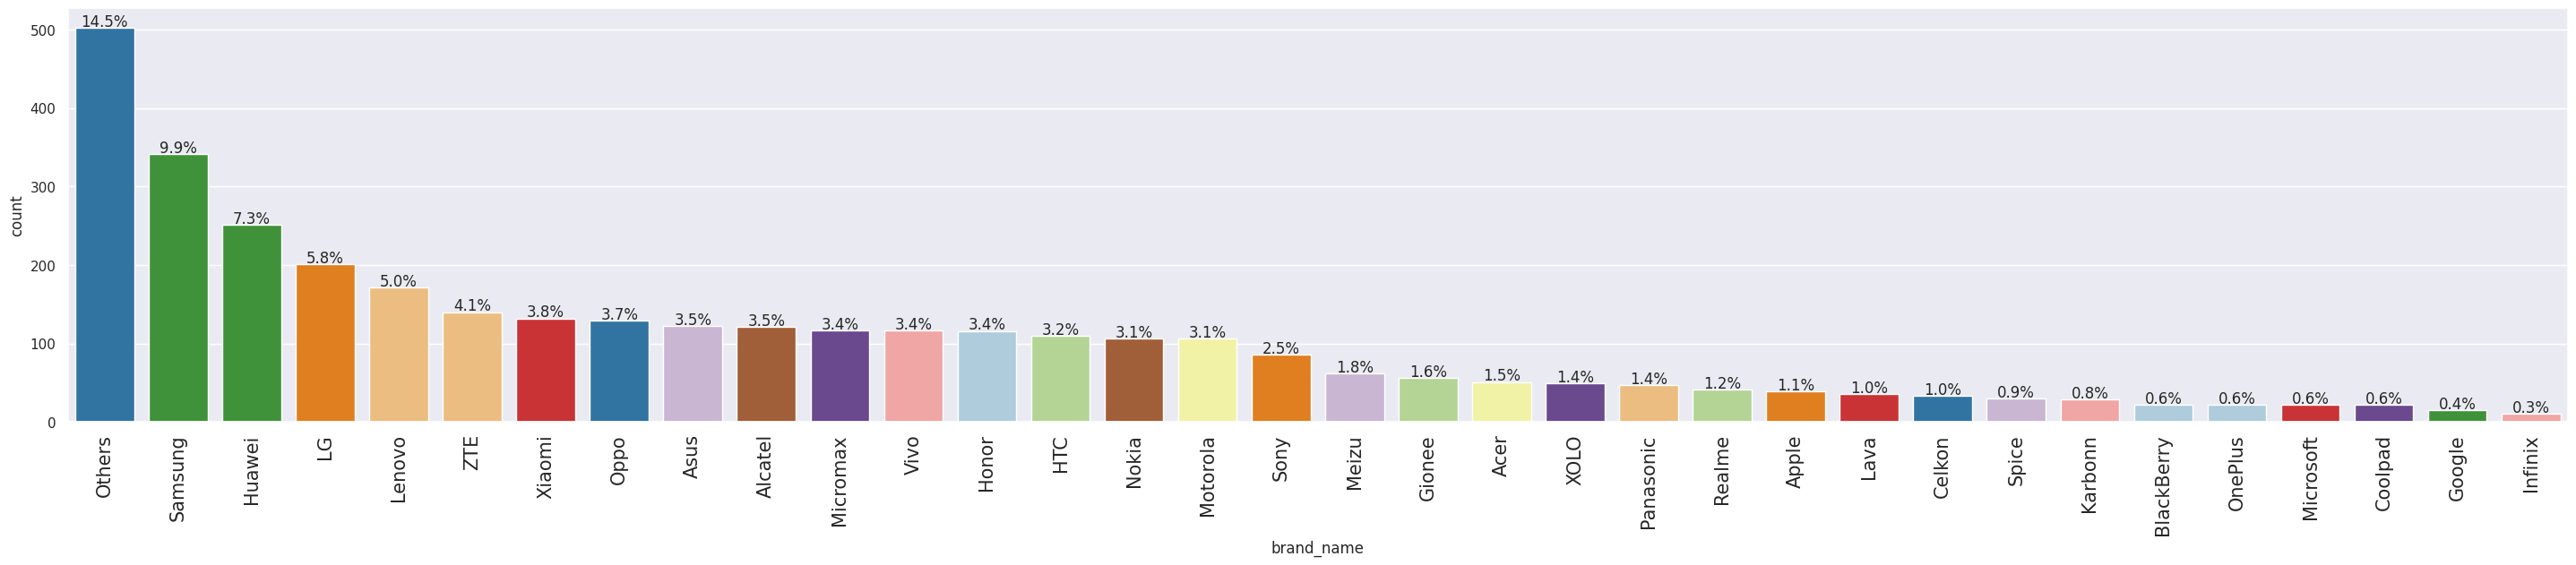

In [ ]:
labeled_barplot(data, "brand_name", perc=True)

**Observation**
* There are 34 types of brand name which inclues 'other' who has no brand name.
* There are about 14.5% of 'other' brands.

# 4G and 5G

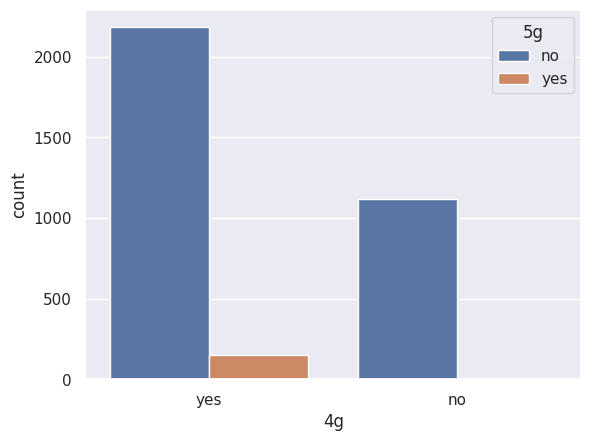

In [ ]:
sns.countplot(data, x='4g', hue= '5g')
plt.show()

**Observation**
* There are very few cell phone has 5G available.
* Most of them have 4G available.
* About 50% of cell phone has no 4G available.

# Operating System

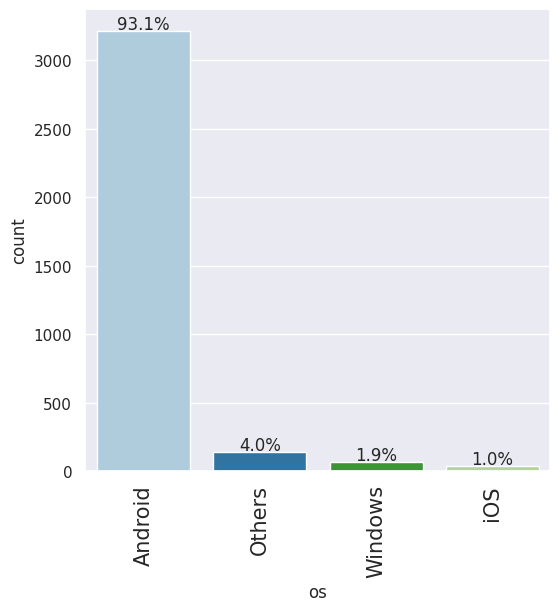

In [ ]:
labeled_barplot(data, "os", perc=True)

**Observation**
* About 93% of the cell phone has Android OS.
* There is only 1% of the cell phones has iOS OS.

# Brand Name vs Weight

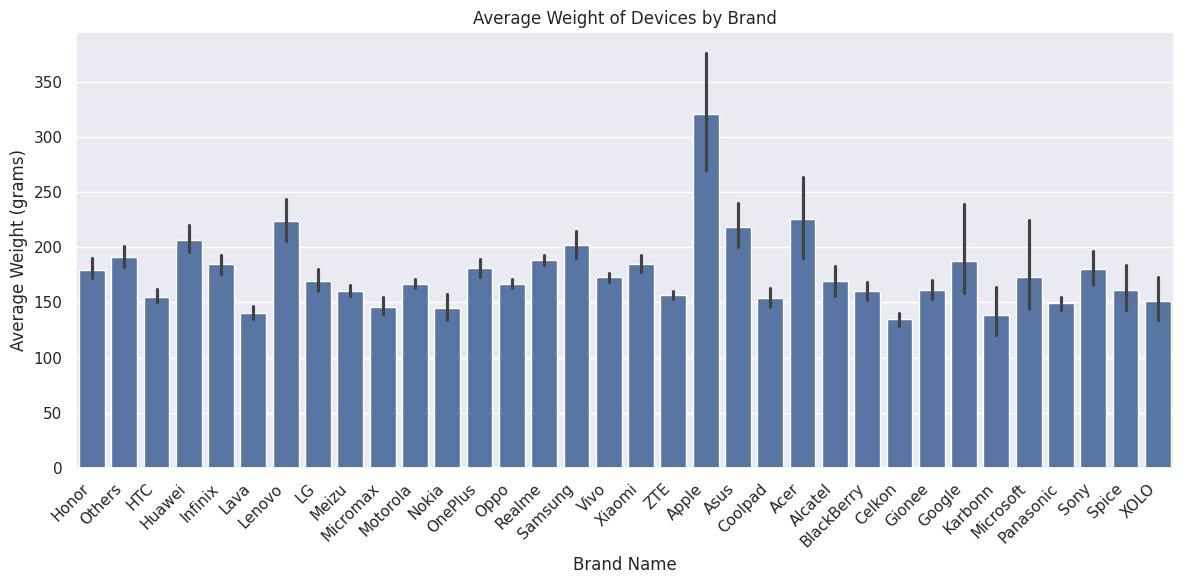

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(x='brand_name', y='weight', data=data)
plt.xticks(rotation=45, ha='right')
plt.xlabel('Brand Name')
plt.ylabel('Average Weight (grams)')
plt.title('Average Weight of Devices by Brand')
plt.tight_layout()
plt.show()


**Observation**
* Apple brand cell phone's average weight is higher than other brands
* All other brand's average weight is below 250 grmas.
* We will check the battery capacity and compare

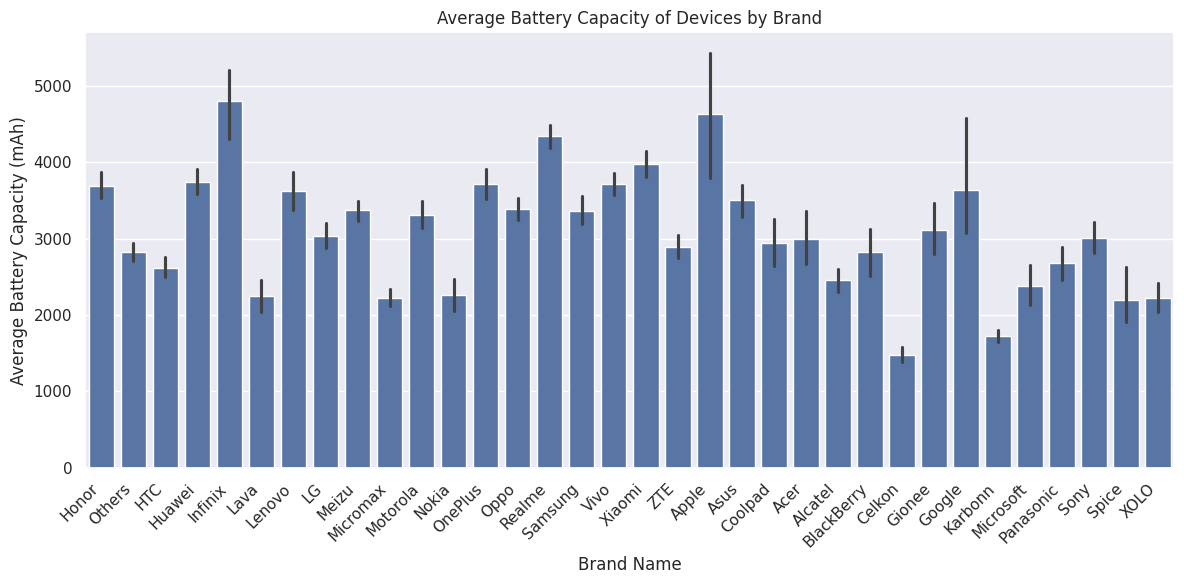

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(x='brand_name', y='battery', data=data)
plt.xticks(rotation=45, ha='right')
plt.xlabel('Brand Name')
plt.ylabel('Average Battery Capacity (mAh)')
plt.title('Average Battery Capacity of Devices by Brand')
plt.tight_layout()
plt.show()


Oservation
* Infinix brand's average battery capacity is higher than other brands, also the weight is low compare to Apple brand which makes is it more comfortable on hand than Apple brand.

# Release Year vs Normalized used price

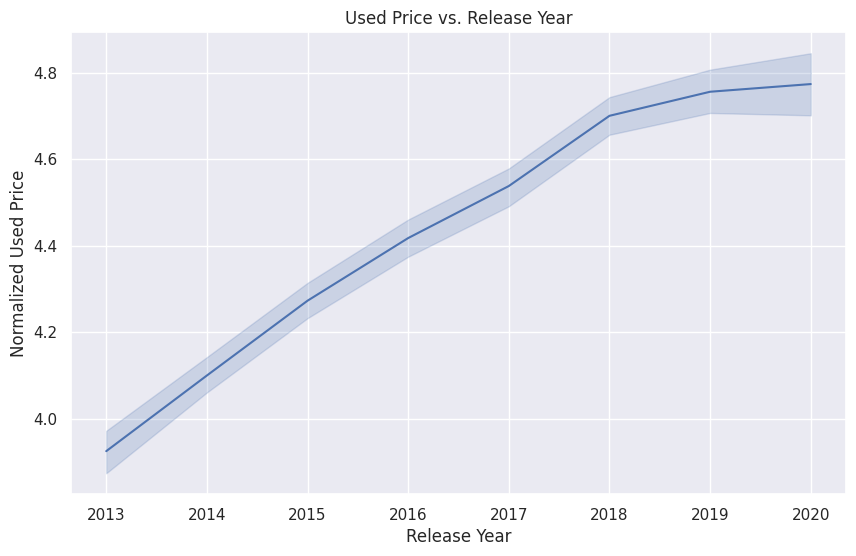

In [ ]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='release_year', y='normalized_used_price', data=data)
plt.xlabel('Release Year')
plt.ylabel('Normalized Used Price')
plt.title('Used Price vs. Release Year')
plt.show()


**Observation**
* Between 2013 and 2019 price of used cellphone increased continuously.
* After 2019 the price hasn't increased that much.

# Used Price vs 4G and 5G

<Figure size 1000x600 with 0 Axes>

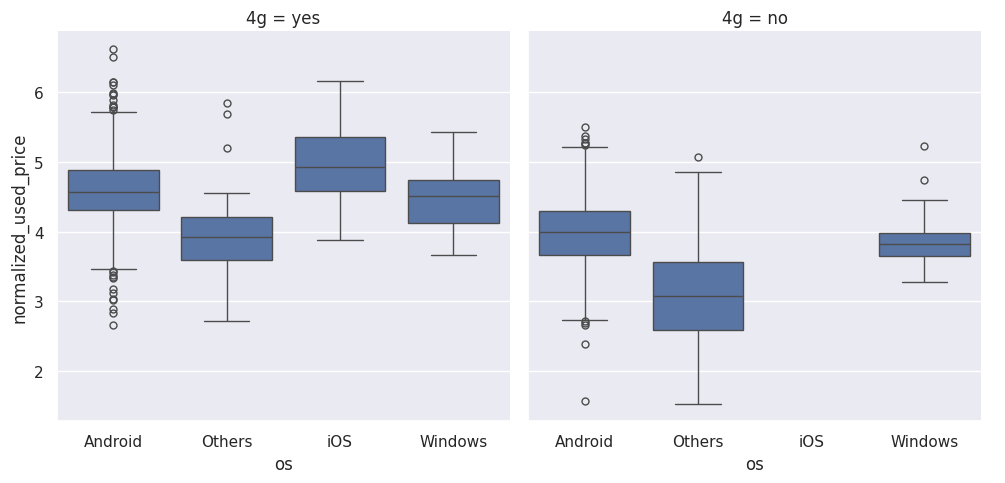

In [ ]:
plt.figure(figsize=(10, 6))
sns.catplot(x='os', y='normalized_used_price',col='4g',data=data,kind='box');



**Observation**
* Normalized used price of cell phone is higher if it supports 4G.

<Figure size 1000x600 with 0 Axes>

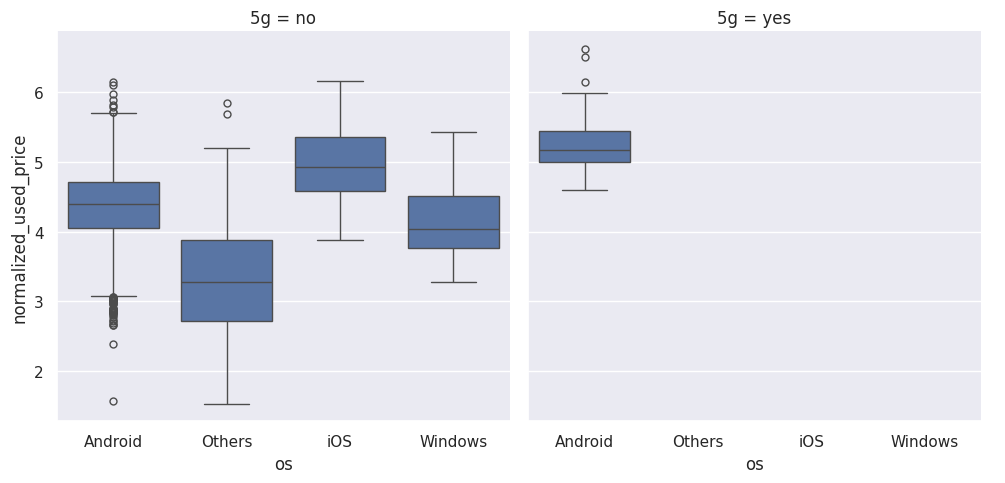

In [ ]:
plt.figure(figsize=(10, 6))
sns.catplot(x='os', y='normalized_used_price',col='5g',data=data,kind='box');

**Observation**
* Normalized used price of cell phone is higher if it supports 5G.

**Questions**:

1. **What does the distribution of normalized used device prices look like?**

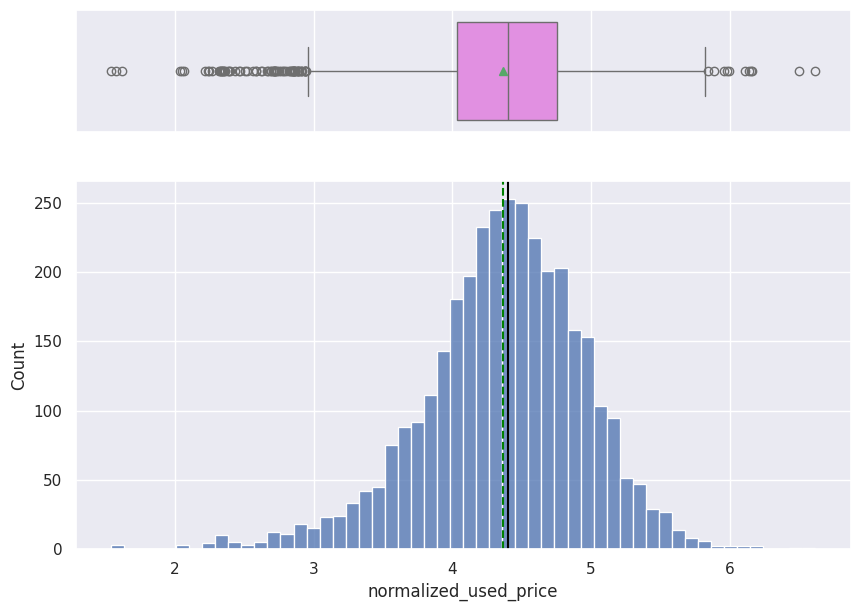

In [ ]:
histogram_boxplot(data, "normalized_used_price")

* The distribution of normalized used device price looks like normally distributed with little left scewed.

2. **What percentage of the used device market is dominated by Android devices?**

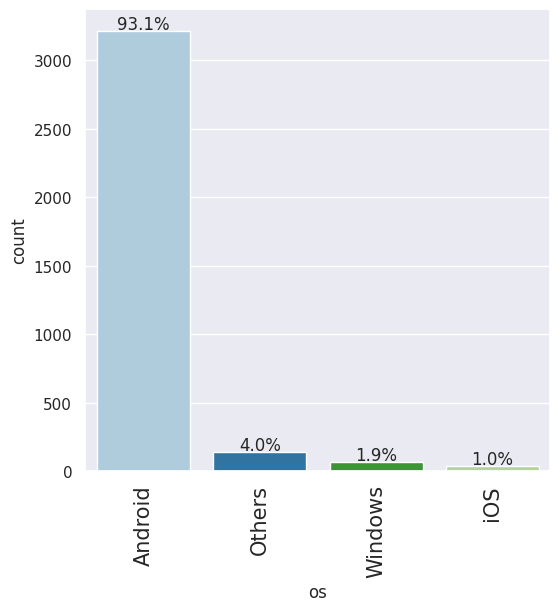

In [ ]:
labeled_barplot(data, "os", perc=True)

* About 93.1% of used devices are dominated by Android devices.

**3. The amount of RAM is important for the smooth functioning of a device. How does the amount of RAM vary with the brand?**

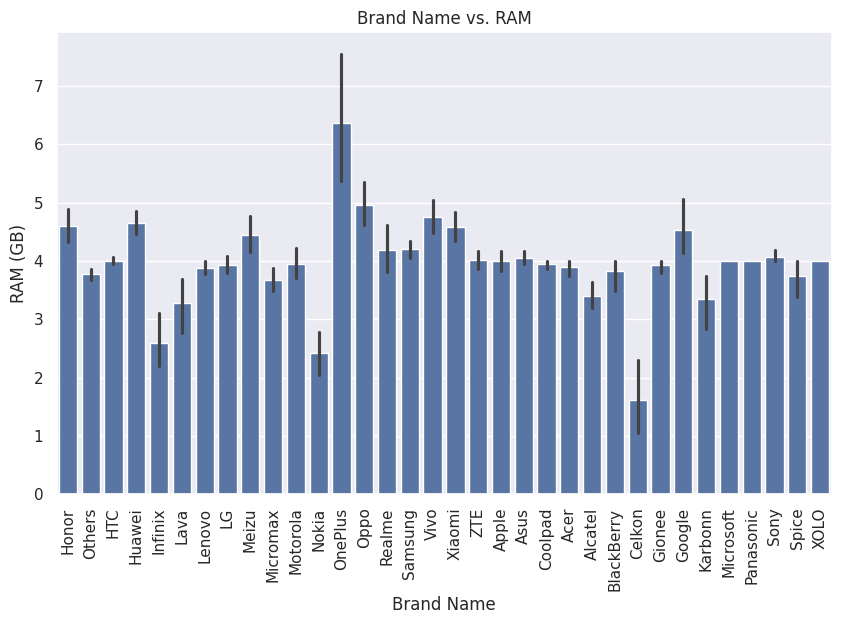

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x='brand_name', y='ram', data=data)
plt.xticks(rotation=90)
plt.title('Brand Name vs. RAM')
plt.xlabel('Brand Name')
plt.ylabel('RAM (GB)')
plt.show()

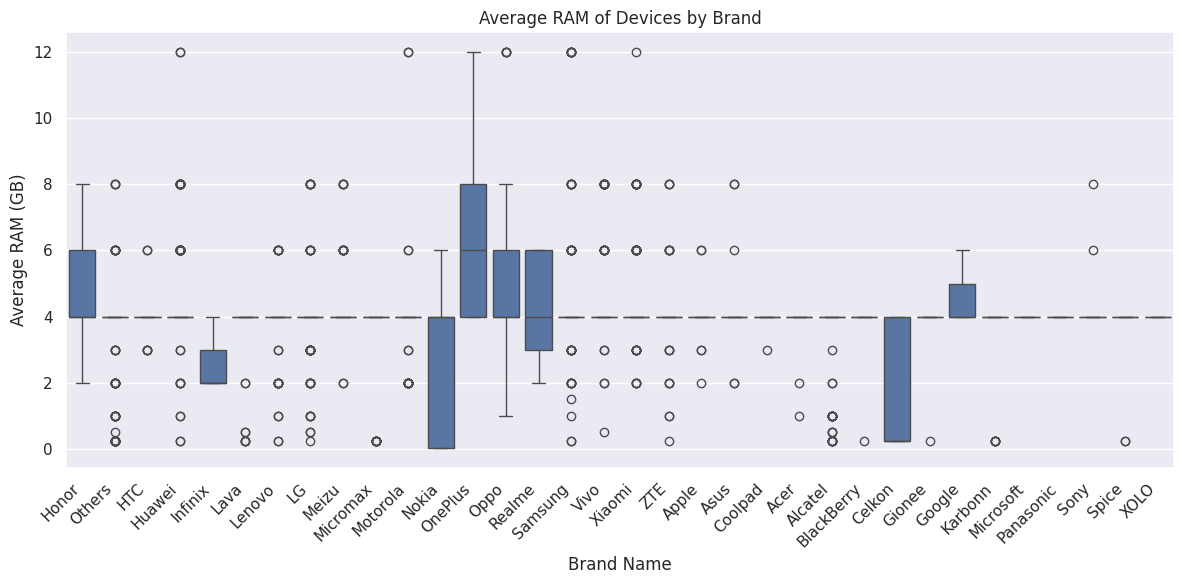

In [ ]:

plt.figure(figsize=(12, 6))
sns.boxplot(x='brand_name', y='ram', data=data)
plt.xticks(rotation=45, ha='right')
plt.xlabel('Brand Name')
plt.ylabel('Average RAM (GB)')
plt.title('Average RAM of Devices by Brand')
plt.tight_layout()
plt.show()


* Most of the brand's mean RAM is 4 GB. OnePlus cell phone brand's mean RAM is about 6.5 GB. Infinix, Nokia and Celkon brand cell phone's mean RAM is less than 3 GB. Celkon's cell phones has the lowest mean RAM which is about 1.5 GB.
* The distribution is very different and there are some outliers.

4. **A large battery often increases a device's weight, making it feel uncomfortable in the hands. How does the weight vary for phones and tablets offering large batteries (more than 4500 mAh)?**

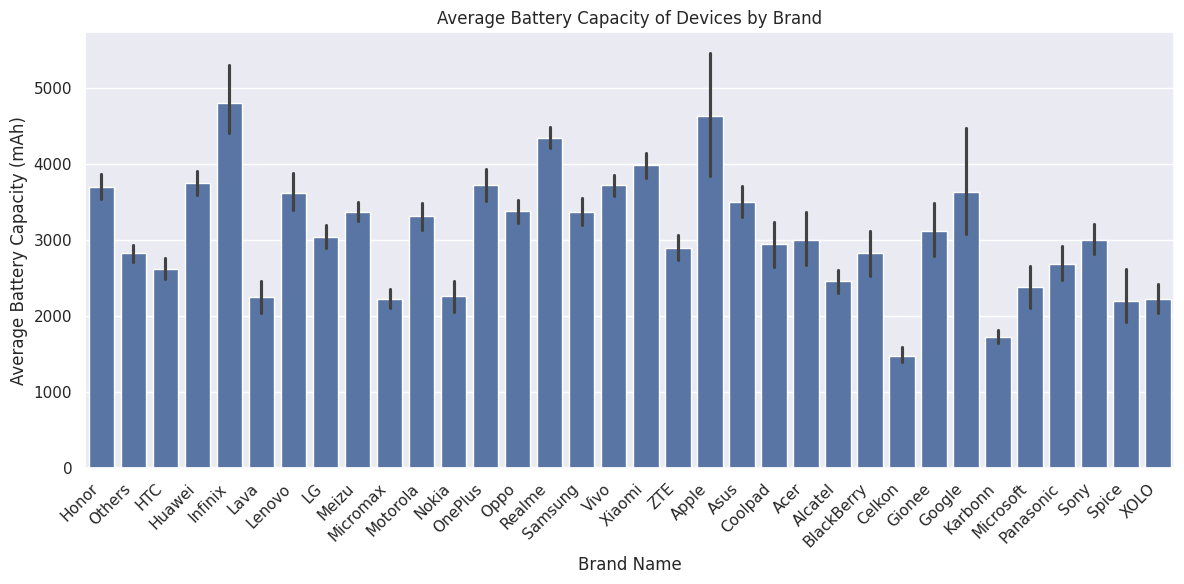

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(x='brand_name', y='battery', data=data)
plt.xticks(rotation=45, ha='right')
plt.xlabel('Brand Name')
plt.ylabel('Average Battery Capacity (mAh)')
plt.title('Average Battery Capacity of Devices by Brand')
plt.tight_layout()
plt.show()


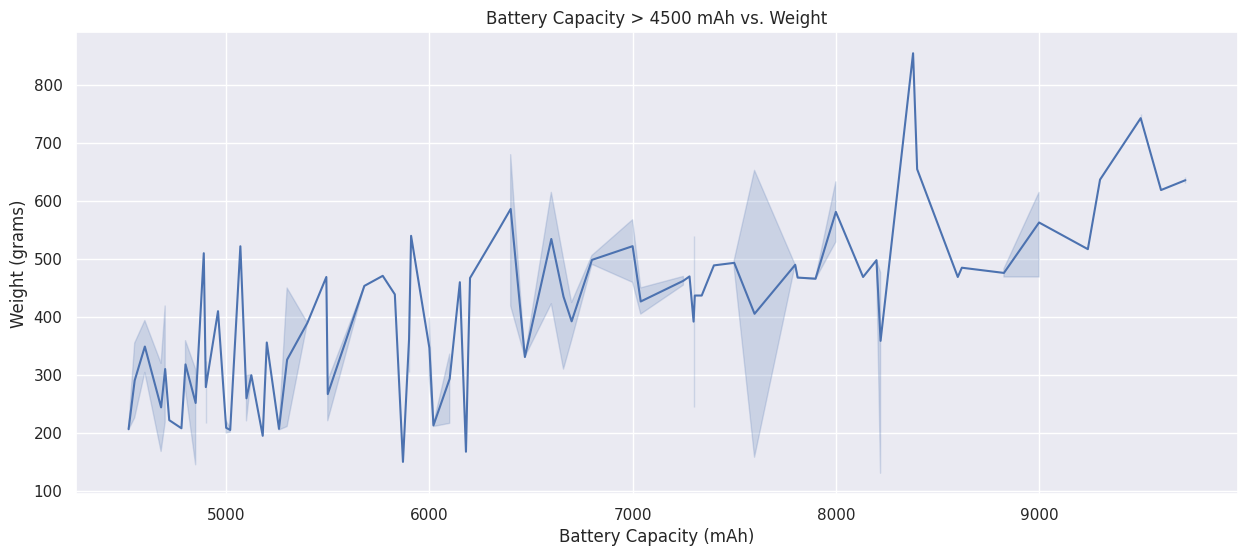

In [ ]:

plt.figure(figsize=(15, 6))
sns.lineplot(x='battery', y='weight', data=data[data.battery > 4500])
plt.title('Battery Capacity > 4500 mAh vs. Weight')
plt.xlabel('Battery Capacity (mAh)')
plt.ylabel('Weight (grams)')
plt.show()

* Line plot shows if battery capacity increses, weight of a cell phone also increases. There is more variation in the data between battery capacity 7000 and 8000 mAh.
* Apple and Infinix brand cellphone's providing battery capacity more than 4500 mAh.

5.**Bigger screens are desirable for entertainment purposes as they offer a better viewing experience. How many phones and tablets are available across different brands with a screen size larger than 6 inches?**

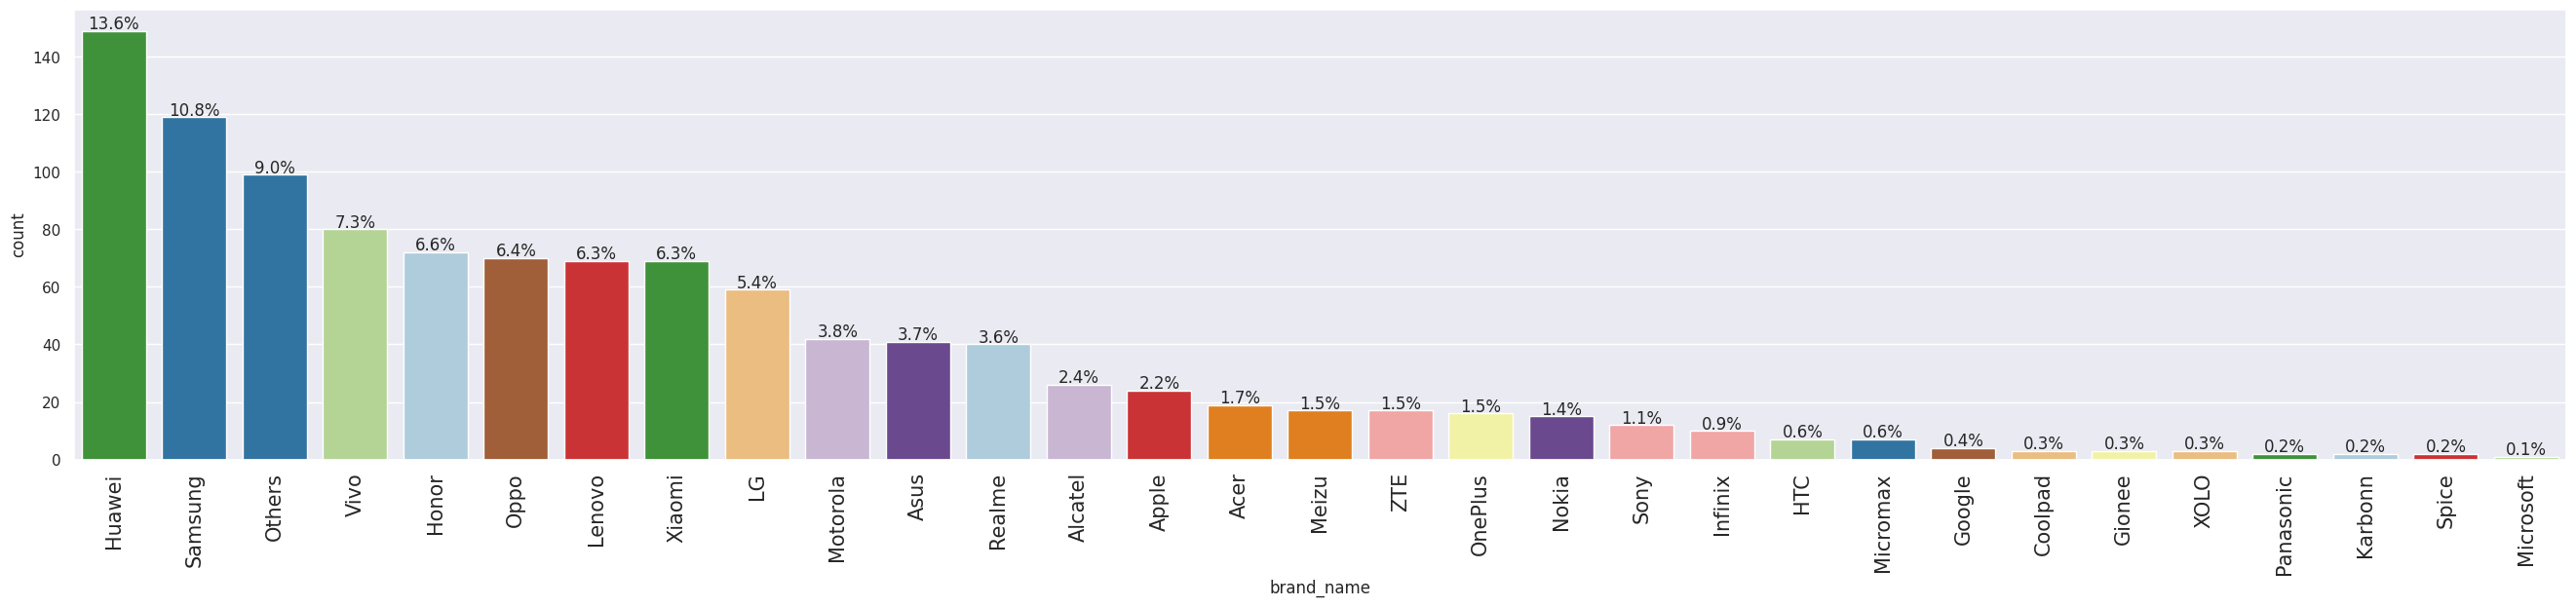

In [ ]:
screen_inch = data.screen_size /2.54
data['screen_inch'] = screen_inch
labeled_barplot(data=data[data['screen_inch'] > 6], feature='brand_name', perc=True)


In [ ]:
screen_inch_6 = data[data['screen_inch'] > 6]
screen_inch_6.shape[0]

1099

* There are 1099 number of cell phones or tablets available whose screen size is more than 6 inches. About 13.6% of Huawei brand cell phone has screen size more than 6 inches.

**6. A lot of devices nowadays offer great selfie cameras, allowing us to capture our favorite moments with loved ones. What is the distribution of devices offering greater than 8MP selfie cameras across brands?**

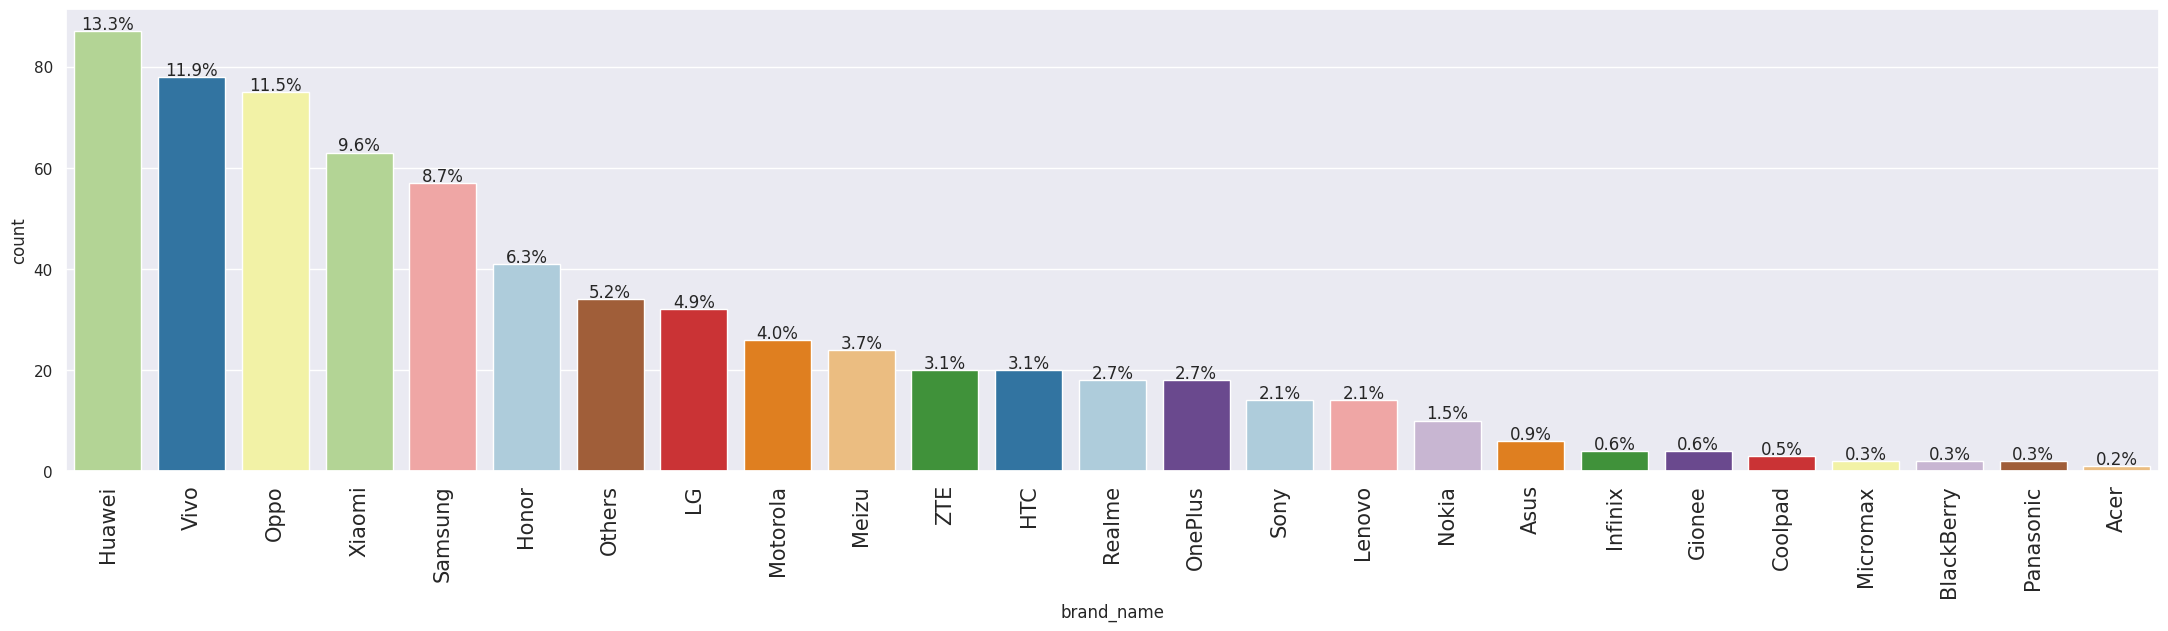

In [ ]:
data['selfie_camera_8'] = data['selfie_camera_mp'] > 8
labeled_barplot(data=data[data['selfie_camera_8']], feature='brand_name', perc=True)

* Huawei, Vivo and Oppo cell phones are the top three brand who are offering more than 8MP selfie camera.

7. **Which attributes are highly correlated with the normalized price of a used device?**

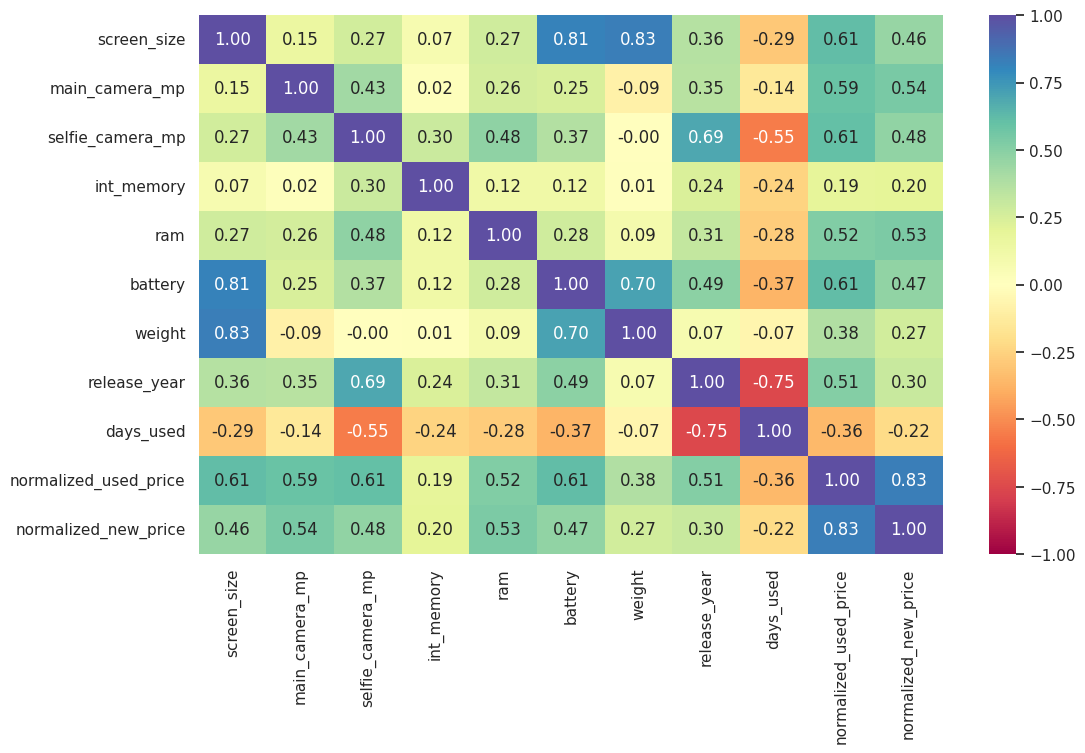

In [ ]:
# creating a list of numerical columns to check correlation.
data= data.drop(columns=['screen_inch'])
num_cols = data.select_dtypes(include=np.number).columns.tolist()
plt.figure(figsize=(12, 7))
sns.heatmap(
    data[num_cols].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

* Used price of cell phone is highly corelated with normalized price of new cell phones, screen size, main camera, selfie camera, battery capacity, RAM and release year of the cell phone.

## Data Preprocessing

- Missing value treatment
- Feature engineering (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling
- Any other preprocessing steps (if needed)

In [ ]:
# Missing value treatment
data.isnull().sum()

brand_name                 0
os                         0
screen_size                0
4g                         0
5g                         0
main_camera_mp           179
selfie_camera_mp           2
int_memory                 4
ram                        4
battery                    6
weight                     7
release_year               0
days_used                  0
normalized_used_price      0
normalized_new_price       0
dtype: int64

In [ ]:
df= data.copy()

In [ ]:
df['main_camera_mp'].unique()

array([13.  ,  8.  ,  5.  , 10.5 ,  3.15,   nan,  2.  , 16.  ,  0.3 ,
       12.  , 14.5 , 48.  ,  3.  , 21.  ,  1.3 , 13.1 , 24.  ,  0.08,
       20.7 , 23.  ,  1.  , 18.  , 12.2 , 12.3 , 20.  , 20.2 ,  4.  ,
       12.5 , 10.  ,  6.5 ,  6.7 , 41.  , 20.1 , 12.6 , 16.3 , 22.6 ,
       19.  , 21.5 , 21.2 ,  8.1 ,  1.2 , 22.5 ])

In [ ]:
#imputing the missing values in the data by the column medians grouped by release_year and brand_name.
imputing_col= ['main_camera_mp', 'selfie_camera_mp', 'int_memory', 'ram', 'battery', 'weight']
for col in imputing_col:
   df[col] = df[col].fillna(value= df.groupby(['brand_name','release_year'])[col].transform("median"))



In [ ]:
# Checking any missing value
df.isnull().sum()

brand_name                 0
os                         0
screen_size                0
4g                         0
5g                         0
main_camera_mp           179
selfie_camera_mp           2
int_memory                 0
ram                        0
battery                    6
weight                     7
release_year               0
days_used                  0
normalized_used_price      0
normalized_new_price       0
dtype: int64

In [ ]:
# imputing the missing values in the data by the column medians grouped brand_name.
for col in imputing_col:
    df[col] = df[col].fillna(value=df.groupby(['brand_name'])[col].transform("median"))

In [ ]:
df.isnull().sum()

brand_name                0
os                        0
screen_size               0
4g                        0
5g                        0
main_camera_mp           10
selfie_camera_mp          0
int_memory                0
ram                       0
battery                   0
weight                    0
release_year              0
days_used                 0
normalized_used_price     0
normalized_new_price      0
dtype: int64

In [ ]:
# imputing the missing values in the data by the column medians
df['main_camera_mp'] = df['main_camera_mp'].fillna(df['main_camera_mp'].median())

In [ ]:
df.isnull().sum()

brand_name               0
os                       0
screen_size              0
4g                       0
5g                       0
main_camera_mp           0
selfie_camera_mp         0
int_memory               0
ram                      0
battery                  0
weight                   0
release_year             0
days_used                0
normalized_used_price    0
normalized_new_price     0
dtype: int64

* We dealt with all missing values.

**Feature engineering**

In [ ]:
# creating a new column age_phone from the release_year column
df['age_phone'] = 2025 - df['release_year']
df.drop("release_year", axis=1, inplace=True) # dropped release year
df.head()

brand_name       os  screen_size   4g   5g  main_camera_mp  \
0      Honor  Android        14.50  yes   no            13.0   
1      Honor  Android        17.30  yes  yes            13.0   
2      Honor  Android        16.69  yes  yes            13.0   
3      Honor  Android        25.50  yes  yes            13.0   
4      Honor  Android        15.32  yes   no            13.0   

   selfie_camera_mp  int_memory  ram  battery  weight  days_used  \
0               5.0        64.0  3.0   3020.0   146.0        127   
1              16.0       128.0  8.0   4300.0   213.0        325   
2               8.0       128.0  8.0   4200.0   213.0        162   
3               8.0        64.0  6.0   7250.0   480.0        345   
4               8.0        64.0  3.0   5000.0   185.0        293   

   normalized_used_price  normalized_new_price  age_phone  
0               4.307572              4.715100          5  
1               5.162097              5.519018          5  
2               5.111084              5.884631          5  
3               5.135387              5.630961          5  
4               4.389995              4.947837          5

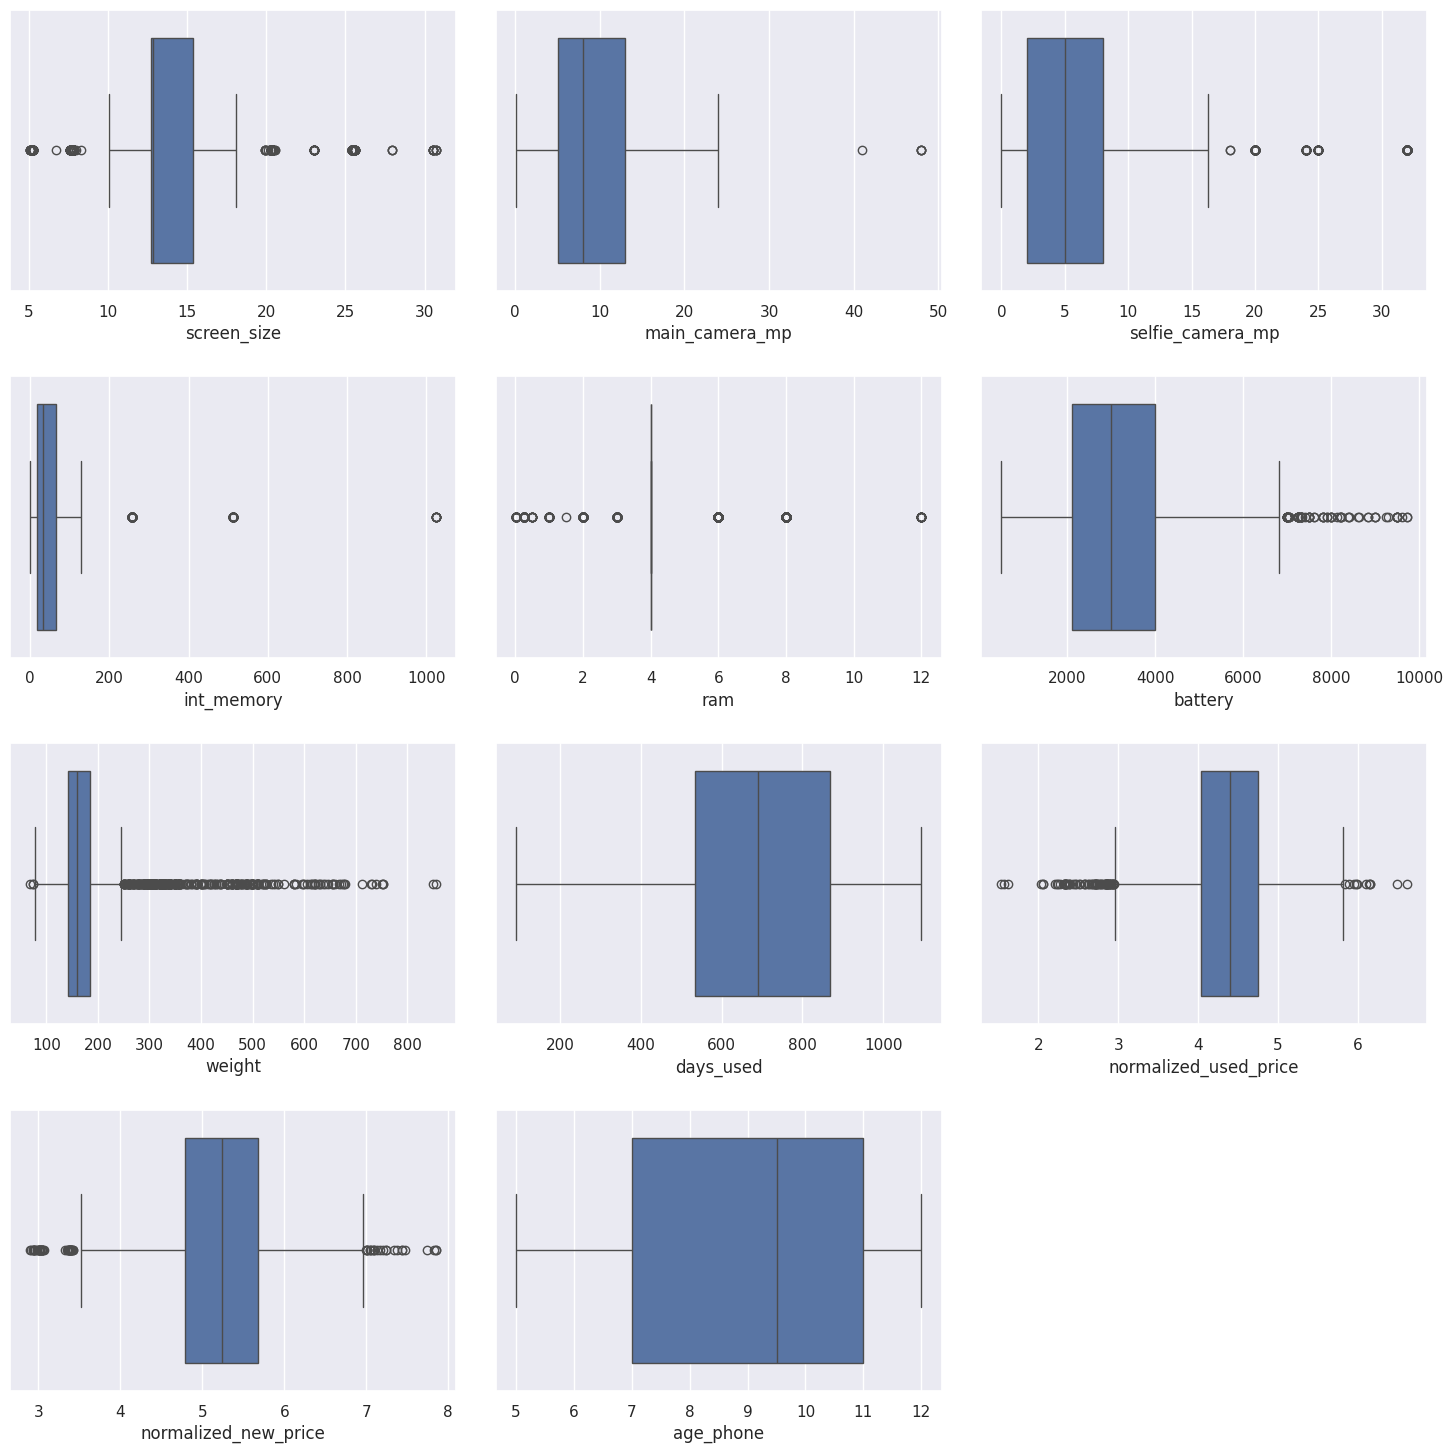

In [ ]:
# outlier detection using boxplot
num_cols = df.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(15, 15))

for i, variable in enumerate(num_cols):
    plt.subplot(4, 3, i + 1)
    sns.boxplot(data=df, x=variable)
    plt.tight_layout(pad=2)

plt.show()

* We will not treat outliers because it's a true values.

* **Preparing data for modeling**

In [ ]:
df.head()

brand_name       os  screen_size   4g   5g  main_camera_mp  \
0      Honor  Android        14.50  yes   no            13.0   
1      Honor  Android        17.30  yes  yes            13.0   
2      Honor  Android        16.69  yes  yes            13.0   
3      Honor  Android        25.50  yes  yes            13.0   
4      Honor  Android        15.32  yes   no            13.0   

   selfie_camera_mp  int_memory  ram  battery  weight  days_used  \
0               5.0        64.0  3.0   3020.0   146.0        127   
1              16.0       128.0  8.0   4300.0   213.0        325   
2               8.0       128.0  8.0   4200.0   213.0        162   
3               8.0        64.0  6.0   7250.0   480.0        345   
4               8.0        64.0  3.0   5000.0   185.0        293   

   normalized_used_price  normalized_new_price  age_phone  
0               4.307572              4.715100          5  
1               5.162097              5.519018          5  
2               5.111084              5.884631          5  
3               5.135387              5.630961          5  
4               4.389995              4.947837          5

In [ ]:
# Creating dummy variables for categorical data
# First we will define the dependent and independent variables
X = df.drop(columns=["normalized_used_price"])
y = df["normalized_used_price"]


In [ ]:
# add the intercept to data
X = sm.add_constant(X)

In [ ]:
# creating dummy variables
X = pd.get_dummies(X, columns=X.select_dtypes(include=["object", "category"]).columns.tolist(),
    drop_first=True,)
X = X.astype(float)

X.head()

const  screen_size  main_camera_mp  selfie_camera_mp  int_memory  ram  \
0    1.0        14.50            13.0               5.0        64.0  3.0   
1    1.0        17.30            13.0              16.0       128.0  8.0   
2    1.0        16.69            13.0               8.0       128.0  8.0   
3    1.0        25.50            13.0               8.0        64.0  6.0   
4    1.0        15.32            13.0               8.0        64.0  3.0   

   battery  weight  days_used  normalized_new_price  ...  brand_name_Spice  \
0   3020.0   146.0      127.0              4.715100  ...               0.0   
1   4300.0   213.0      325.0              5.519018  ...               0.0   
2   4200.0   213.0      162.0              5.884631  ...               0.0   
3   7250.0   480.0      345.0              5.630961  ...               0.0   
4   5000.0   185.0      293.0              4.947837  ...               0.0   

   brand_name_Vivo  brand_name_XOLO  brand_name_Xiaomi  brand_name_ZTE  \
0              0.0              0.0                0.0             0.0   
1              0.0              0.0                0.0             0.0   
2              0.0              0.0                0.0             0.0   
3              0.0              0.0                0.0             0.0   
4              0.0              0.0                0.0             0.0   

   os_Others  os_Windows  os_iOS  4g_yes  5g_yes  
0        0.0         0.0     0.0     1.0     0.0  
1        0.0         0.0     0.0     1.0     1.0  
2        0.0         0.0     0.0     1.0     1.0  
3        0.0         0.0     0.0     1.0     1.0  
4        0.0         0.0     0.0     1.0     0.0  

[5 rows x 49 columns]

In [ ]:
# splitting the data in 70:30 ratio for train to test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)


In [ ]:
print(X_train.head())

      const  screen_size  main_camera_mp  selfie_camera_mp  int_memory  ram  \
3026    1.0        10.29             8.0               0.3        16.0  4.0   
1525    1.0        15.34            13.0               5.0        32.0  4.0   
1128    1.0        12.70            13.0               5.0        32.0  4.0   
3003    1.0        12.83             8.0               5.0        16.0  4.0   
2907    1.0        12.88            13.0              16.0        16.0  4.0   

      battery  weight  days_used  normalized_new_price  ...  brand_name_Spice  \
3026   1800.0   120.0      819.0              4.796204  ...               0.0   
1525   4050.0   225.0      585.0              5.434595  ...               0.0   
1128   2550.0   162.0      727.0              5.137914  ...               0.0   
3003   3200.0   126.0      800.0              5.189228  ...               0.0   
2907   2900.0   160.0      560.0              5.016220  ...               0.0   

      brand_name_Vivo  brand_name_XOLO

In [ ]:
print(X_test.head())

      const  screen_size  main_camera_mp  selfie_camera_mp  int_memory   ram  \
866     1.0        15.24            8.00               2.0        16.0  4.00   
957     1.0        10.16            3.15               0.3       512.0  0.25   
280     1.0        15.39            8.00               8.0        32.0  2.00   
2150    1.0        12.83           13.00              16.0        64.0  4.00   
93      1.0        15.29           13.00               5.0        32.0  3.00   

      battery  weight  days_used  normalized_new_price  ...  brand_name_Spice  \
866    3000.0   206.0      632.0              5.190788  ...               0.0   
957    1400.0   140.0      637.0              3.884652  ...               0.0   
280    5000.0   185.0      329.0              4.487287  ...               0.0   
2150   3200.0   148.0      648.0              5.639422  ...               0.0   
93     3500.0   179.0      216.0              5.300415  ...               0.0   

      brand_name_Vivo  brand_nam

## EDA

- It is a good idea to explore the data once again after manipulating it.

In [ ]:
df.describe().T

count         mean          std         min  \
screen_size            3454.0    13.713115     3.805280    5.080000   
main_camera_mp         3454.0     9.617597     4.749438    0.080000   
selfie_camera_mp       3454.0     6.555067     6.968440    0.000000   
int_memory             3454.0    54.528474    84.934991    0.010000   
ram                    3454.0     4.032620     1.368598    0.020000   
battery                3454.0  3132.577446  1298.884193  500.000000   
weight                 3454.0   182.636856    88.360445   69.000000   
days_used              3454.0   674.869716   248.580166   91.000000   
normalized_used_price  3454.0     4.364712     0.588914    1.536867   
normalized_new_price   3454.0     5.233107     0.683637    2.901422   
age_phone              3454.0     9.034742     2.298455    5.000000   

                               25%          50%          75%          max  
screen_size              12.700000    12.830000    15.340000    30.710000  
main_camera_mp            5.000000     8.000000    13.000000    48.000000  
selfie_camera_mp          2.000000     5.000000     8.000000    32.000000  
int_memory               16.000000    32.000000    64.000000  1024.000000  
ram                       4.000000     4.000000     4.000000    12.000000  
battery                2100.000000  3000.000000  4000.000000  9720.000000  
weight                  142.000000   160.000000   185.000000   855.000000  
days_used               533.500000   690.500000   868.750000  1094.000000  
normalized_used_price     4.033931     4.405133     4.755700     6.619433  
normalized_new_price      4.790342     5.245892     5.673718     7.847841  
age_phone                 7.000000     9.500000    11.000000    12.000000

In [ ]:
df.describe(include="object").T

count unique      top  freq
brand_name  3454     34   Others   502
os          3454      4  Android  3214
4g          3454      2      yes  2335
5g          3454      2       no  3302

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3454 entries, 0 to 3453
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   brand_name             3454 non-null   object 
 1   os                     3454 non-null   object 
 2   screen_size            3454 non-null   float64
 3   4g                     3454 non-null   object 
 4   5g                     3454 non-null   object 
 5   main_camera_mp         3454 non-null   float64
 6   selfie_camera_mp       3454 non-null   float64
 7   int_memory             3454 non-null   float64
 8   ram                    3454 non-null   float64
 9   battery                3454 non-null   float64
 10  weight                 3454 non-null   float64
 11  days_used              3454 non-null   int64  
 12  normalized_used_price  3454 non-null   float64
 13  normalized_new_price   3454 non-null   float64
 14  age_phone              3454 non-null   int64  
dtypes: f

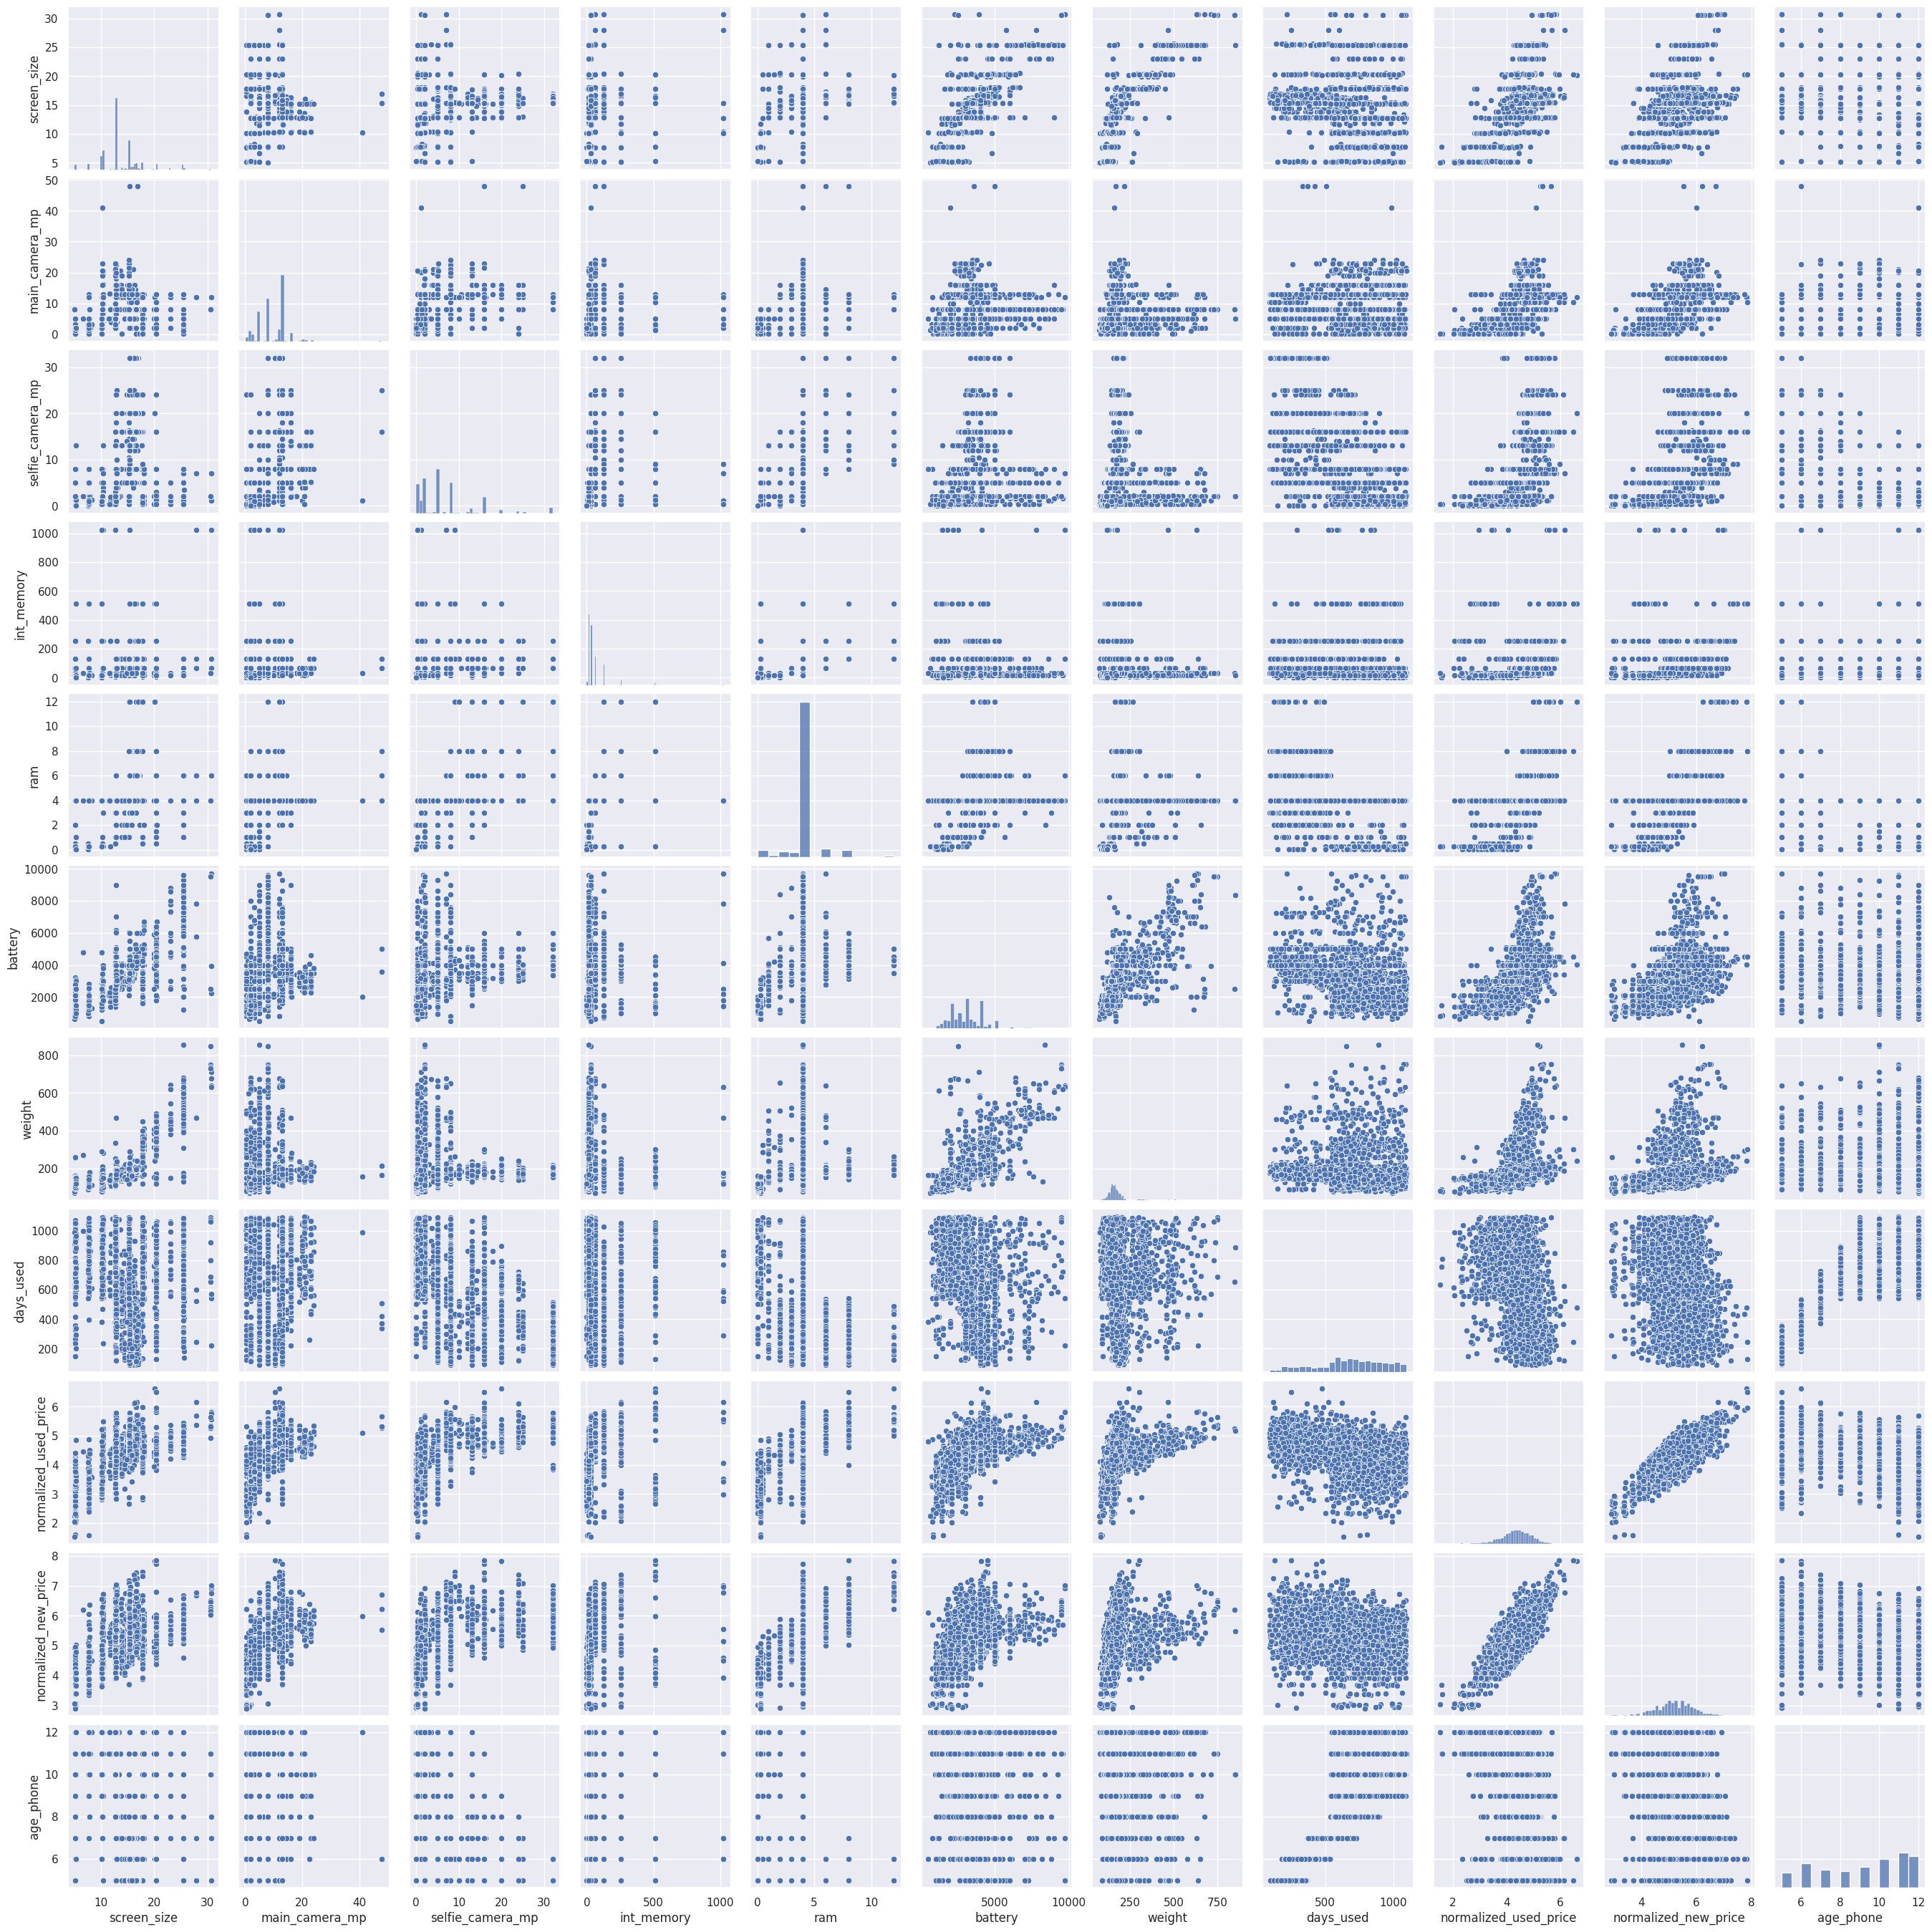

In [ ]:
sns.pairplot(df)
plt.show()


* The data looks good to do linear regression.

## Model Building - Linear Regression

In [ ]:
olsmod = sm.OLS(y_train, X_train).fit()
olsmod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     normalized_used_price   R-squared:                       0.845
Model:                               OLS   Adj. R-squared:                  0.842
Method:                    Least Squares   F-statistic:                     268.7
Date:                   Mon, 14 Apr 2025   Prob (F-statistic):               0.00
Time:                           00:00:10   Log-Likelihood:                 123.85
No. Observations:                   2417   AIC:                            -149.7
Df Residuals:                       2368   BIC:                             134.0
Df Model:                             48                                         
Covariance Type:               nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     1.4103      0.076     18.483      0.000       1.261       1.560
screen_size               0.0244      0.003      7.163      0.000       0.018       0.031
main_camera_mp            0.0208      0.002     13.848      0.000       0.018       0.024
selfie_camera_mp          0.0135      0.001     11.997      0.000       0.011       0.016
int_memory                0.0001   6.97e-05      1.651      0.099   -2.16e-05       0.000
ram                       0.0230      0.005      4.451      0.000       0.013       0.033
battery               -1.689e-05   7.27e-06     -2.321      0.020   -3.12e-05   -2.62e-06
weight                    0.0010      0.000      7.480      0.000       0.001       0.001
days_used              4.216e-05   3.09e-05      1.366      0.172   -1.84e-05       0.000
normalized_new_price      0.4311      0.012     35.147      0.000       0.407       0.455
age_phone                -0.0237      0.005     -5.193      0.000      -0.033      -0.015
brand_name_Alcatel        0.0154      0.048      0.323      0.747      -0.078       0.109
brand_name_Apple         -0.0038      0.147     -0.026      0.980      -0.292       0.285
brand_name_Asus           0.0151      0.048      0.314      0.753      -0.079       0.109
brand_name_BlackBerry    -0.0300      0.070     -0.427      0.669      -0.168       0.108
brand_name_Celkon        -0.0468      0.066     -0.707      0.480      -0.177       0.083
brand_name_Coolpad        0.0209      0.073      0.287      0.774      -0.122       0.164
brand_name_Gionee         0.0448      0.058      0.775      0.438      -0.068       0.158
brand_name_Google        -0.0326      0.085     -0.385      0.700      -0.199       0.133
brand_name_HTC           -0.0130      0.048     -0.270      0.787      -0.108       0.081
brand_name_Honor          0.0317      0.049      0.644      0.520      -0.065       0.128
brand_name_Huawei        -0.0020      0.044     -0.046      0.964      -0.089       0.085
brand_name_Infinix        0.1633      0.093      1.752      0.080      -0.019       0.346
brand_name_Karbonn        0.0943      0.067      1.405      0.160      -0.037       0.226
brand_name_LG            -0.0132      0.045     -0.291      0.771      -0.102       0.076
brand_name_Lava           0.0332      0.062      0.533      0.594      -0.089       0.155
brand_name_Lenovo         0.0454      0.045      1.004      0.316      -0.043       0.134
brand_name_Meizu         -0.0129      0.056     -0.230      0.818      -0.123       0.097
brand_name_Micromax      -0.0337      0.048     -0.704      0.481      -0.128       0.060
brand_name_Microsoft      0.0952      0.088      1.078      0.281      -0.078       0.268
brand_name_Motorola      -0.0112      0.050     -0.226      0.821      -0.109   

1. **Adjusted. R-squared**: It reflects the fit of the model.
    - Adjusted R-squared values generally range from 0 to 1, where a higher value generally indicates a better fit, assuming certain conditions are met.
    - In our case, the value for adj. R-squared is **0.842**, which is good.


2. ***const* coefficient**: It is the Y-intercept.
    - It means that if all the predictor variable coefficients are zero, then the expected output (i.e., Y) would be equal to the *const* coefficient.
    - In our case, the value for `const` coefficient is **1.4103**


3. **Coefficient of a predictor variable**: It represents the change in the output Y due to a change in the predictor variable (everything else held constant).
    - In our case, the coefficient of `Screen size` is **0.0244**.

## Model Performance Check

In [ ]:
# Creating function to check model performance
# function to compute adjusted R-squared
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))


# function to compute MAPE
def mape_score(targets, predictions):
    return np.mean(np.abs(targets - predictions) / targets) * 100


# function to compute different metrics to check performance of a regression model
def model_performance_regression(model, predictors, target):
    # predicting using the independent variables
    pred = model.predict(predictors)

    r2 = r2_score(target, pred)  # to compute R-squared
    adjr2 = adj_r2_score(predictors, target, pred)  # to compute adjusted R-squared
    rmse = np.sqrt(mean_squared_error(target, pred))  # to compute RMSE
    mae = mean_absolute_error(target, pred)  # to compute MAE
    mape = mape_score(target, pred)  # to compute MAPE

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "R-squared": r2,
            "Adj. R-squared": adjr2,
            "MAPE": mape,
        },
        index=[0],
    )

    return df_perf

In [ ]:
# checking model performance on train set (seen 70% data)
olsmodel_train_perf = model_performance_regression(olsmod, X_train, y_train)
olsmodel_train_perf

RMSE       MAE  R-squared  Adj. R-squared      MAPE
0  0.229884  0.180326   0.844886        0.841675  4.326841

In [ ]:
# checking model performance on test set (seen 30% data)
olsmodel_test_perf = model_performance_regression(olsmod, X_test, y_test)
olsmodel_test_perf

RMSE       MAE  R-squared  Adj. R-squared      MAPE
0  0.238358  0.184749   0.842479        0.834659  4.501651

**Observations**

- The training $R^2$ is 0.84, so the model is not underfitting

- The train and test RMSE and MAE are comparable, so the model is not overfitting either

- MAE suggests that the model can predict used cell phone price within a mean error of 0.18 on the test data

- MAPE of 4.5 on the test data means that we are able to predict within 4.5% of the price.

## Checking Linear Regression Assumptions

- In order to make statistical inferences from a linear regression model, it is important to ensure that the assumptions of linear regression are satisfied.

1.**Check for Multicollinearity**
* **General Rule of Thumb**:

    - If VIF is 1, then there is no correlation among the kth predictor and the remaining predictor variables,
    - If VIF exceeds 5, we say there is moderate VIF, and
    - if it is 10 or exceeding 10, it shows signs of high multi-collinearity.
    - We will ignore the VIF values for dummy variables and the constant (intercept)
    - Drop every column one by one that has a VIF score greater than 5

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def vif_check(predictors):
    vif = pd.DataFrame()
    vif["feature"] = predictors.columns
    vif["VIF"] = [variance_inflation_factor(predictors.values, i)
        for i in range(len(predictors.columns))]
    return vif

In [ ]:
vif_check(X_train).sort_values(by="VIF", ascending=False)

feature         VIF
0                   const  260.876556
12       brand_name_Apple   13.057668
46                 os_iOS   11.784684
34      brand_name_Others    9.711034
1             screen_size    7.677290
37     brand_name_Samsung    7.539866
7                  weight    6.396749
21      brand_name_Huawei    5.983852
10              age_phone    4.899007
24          brand_name_LG    4.849832
26      brand_name_Lenovo    4.558941
6                 battery    4.081780
33        brand_name_Oppo    3.971194
43         brand_name_ZTE    3.797581
42      brand_name_Xiaomi    3.719689
40        brand_name_Vivo    3.651437
31       brand_name_Nokia    3.479849
19         brand_name_HTC    3.410361
11     brand_name_Alcatel    3.405693
28    brand_name_Micromax    3.363521
20       brand_name_Honor    3.340687
13        brand_name_Asus    3.332038
30    brand_name_Motorola    3.274558
9    normalized_new_price    3.119430
38        brand_name_Sony    2.943161
3        selfie_camera_mp    2.812473
8               days_used    2.660269
47                 4g_yes    2.467681
2          main_camera_mp    2.285051
5                     ram    2.282352
27       brand_name_Meizu    2.179607
41        brand_name_XOLO    2.138070
35   brand_name_Panasonic    2.105703
17      brand_name_Gionee    1.951272
36      brand_name_Realme    1.946812
29   brand_name_Microsoft    1.869751
44              os_Others    1.859863
48                 5g_yes    1.813900
15      brand_name_Celkon    1.774721
25        brand_name_Lava    1.711360
39       brand_name_Spice    1.688863
14  brand_name_BlackBerry    1.632378
45             os_Windows    1.596034
23     brand_name_Karbonn    1.573702
16     brand_name_Coolpad    1.468006
32     brand_name_OnePlus    1.437034
4              int_memory    1.364152
18      brand_name_Google    1.321778
22     brand_name_Infinix    1.283955

### Removing Multicollinearity
Let's define a function that will help us do this.

In [ ]:
def treating_multicollinearity(predictors, target, high_vif_columns):
    """
    Checking the effect of dropping the columns showing high multicollinearity
    on model performance (adj. R-squared and RMSE)

    predictors: independent variables
    target: dependent variable
    high_vif_columns: columns having high VIF
    """
    # empty lists to store adj. R-squared and RMSE values
    adj_r2 = []
    rmse = []

    # build ols models by dropping one of the high VIF columns at a time
    # store the adjusted R-squared and RMSE in the lists defined previously
    for cols in high_vif_columns:
        # defining the new train set
        train = predictors.loc[:, ~predictors.columns.str.startswith(cols)]

        # create the model
        olsmodel = sm.OLS(target, train).fit()

        # adding adj. R-squared and RMSE to the lists
        adj_r2.append(olsmodel.rsquared_adj)
        rmse.append(np.sqrt(olsmodel.mse_resid))

    # creating a dataframe for the results
    temp = pd.DataFrame(
        {
            "col": high_vif_columns,
            "Adj. R-squared after_dropping col": adj_r2,
            "RMSE after dropping col": rmse,
        }
    ).sort_values(by="Adj. R-squared after_dropping col", ascending=False)
    temp.reset_index(drop=True, inplace=True)

    return temp

In [ ]:
col_list = ['screen_size', 'weight']

res = treating_multicollinearity(X_train, y_train, col_list)
res

col  Adj. R-squared after_dropping col  RMSE after dropping col
0  screen_size                           0.838381                 0.234703
1       weight                           0.838071                 0.234928

* Both screen size and weight's $R^2$ is almost same. I would drop weight because screen size is more important to predict the price.
* And Weight is highly corelated with battery so If we drop weight, it wouldn't make that much difference.

In [ ]:
# Dropping Weight because of high VIF value
col_to_drop = "weight"
x_train2 = X_train.loc[:, ~X_train.columns.str.startswith(col_to_drop)]
x_test2 = X_test.loc[:, ~X_test.columns.str.startswith(col_to_drop)]

# Check VIF now
vif = vif_check(x_train2)
print("VIF after dropping ", col_to_drop)
vif.sort_values(by="VIF", ascending=False)

VIF after dropping  weight


feature         VIF
0                   const  235.323689
11       brand_name_Apple   13.052085
45                 os_iOS   11.750869
33      brand_name_Others    9.680324
36     brand_name_Samsung    7.537336
20      brand_name_Huawei    5.983684
23          brand_name_LG    4.849000
9               age_phone    4.726722
25      brand_name_Lenovo    4.557575
32        brand_name_Oppo    3.971169
42         brand_name_ZTE    3.795623
41      brand_name_Xiaomi    3.719683
6                 battery    3.681135
39        brand_name_Vivo    3.650722
1             screen_size    3.593184
30       brand_name_Nokia    3.474548
18         brand_name_HTC    3.408430
10     brand_name_Alcatel    3.405634
27    brand_name_Micromax    3.363424
19       brand_name_Honor    3.339066
12        brand_name_Asus    3.329527
29    brand_name_Motorola    3.269552
8    normalized_new_price    3.116297
37        brand_name_Sony    2.939161
3        selfie_camera_mp    2.787946
7               days_used    2.648280
46                 4g_yes    2.447780
5                     ram    2.280390
2          main_camera_mp    2.188817
26       brand_name_Meizu    2.179175
40        brand_name_XOLO    2.136746
34   brand_name_Panasonic    2.105687
16      brand_name_Gionee    1.951224
35      brand_name_Realme    1.946779
28   brand_name_Microsoft    1.867689
47                 5g_yes    1.811783
14      brand_name_Celkon    1.774249
43              os_Others    1.744860
24        brand_name_Lava    1.711137
38       brand_name_Spice    1.686997
13  brand_name_BlackBerry    1.632331
44             os_Windows    1.596034
22     brand_name_Karbonn    1.573621
15     brand_name_Coolpad    1.467932
31     brand_name_OnePlus    1.436740
4              int_memory    1.364018
17      brand_name_Google    1.321656
21     brand_name_Infinix    1.282407

* We will not drop dummy variable whose VIF is high, so features looks good.
* We treated multicoliniarity.

In [ ]:
# Let's check the model
olsmod1 = sm.OLS(y_train, x_train2).fit()
print(olsmod1.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.841
Model:                               OLS   Adj. R-squared:                  0.838
Method:                    Least Squares   F-statistic:                     267.0
Date:                   Mon, 14 Apr 2025   Prob (F-statistic):               0.00
Time:                           00:18:16   Log-Likelihood:                 95.629
No. Observations:                   2417   AIC:                            -95.26
Df Residuals:                       2369   BIC:                             182.7
Df Model:                             47                                         
Covariance Type:               nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------


* $R^2$ looks good after treating multicolinearity.

### Dealing with high p-value variables
- Some of the dummy variables in the data have p-value > 0.05. So, they are not significant and we'll drop them
- But sometimes p-values change after dropping a variable. So, we'll not drop all variables at once
- Instead, we will do the following:
    - Build a model, check the p-values of the variables, and drop the column with the highest p-value
    - Create a new model without the dropped feature, check the p-values of the variables, and drop the column with the highest p-value
    - Repeat the above two steps till there are no columns with p-value > 0.05

In [ ]:
# initial list of columns
predictors = x_train2.copy()
cols = predictors.columns.tolist()

# setting an initial max p-value
max_p_value = 1

while len(cols) > 0:
    # defining the train set
    x_train_aux = predictors[cols]

    # fitting the model
    model = sm.OLS(y_train, x_train_aux).fit()

    # getting the p-values and the maximum p-value
    p_values = model.pvalues
    max_p_value = max(p_values)

    # name of the variable with maximum p-value
    feature_with_p_max = p_values.idxmax()

    if max_p_value > 0.05:
        cols.remove(feature_with_p_max)
    else:
        break

selected_features = cols
print(selected_features)

['const', 'screen_size', 'main_camera_mp', 'selfie_camera_mp', 'ram', 'days_used', 'normalized_new_price', 'age_phone', 'brand_name_Lenovo', 'brand_name_Nokia', 'brand_name_Xiaomi', '4g_yes']


In [ ]:
x_train3 = x_train2[selected_features]
x_test3 = x_test2[selected_features]

In [ ]:
# Checking model performance after droping high p value features.
olsmod2 = sm.OLS(y_train, x_train3).fit()
print(olsmod2.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.839
Model:                               OLS   Adj. R-squared:                  0.839
Method:                    Least Squares   F-statistic:                     1142.
Date:                   Mon, 14 Apr 2025   Prob (F-statistic):               0.00
Time:                           00:20:59   Log-Likelihood:                 81.071
No. Observations:                   2417   AIC:                            -138.1
Df Residuals:                       2405   BIC:                            -68.66
Df Model:                             11                                         
Covariance Type:               nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
co

* $R^2$ value looks good after treating P value.

In [ ]:
# checking model performance on train set (seen 70% data)
print("Training Performance\n")
olsmod2_train_perf = model_performance_regression(olsmod2, x_train3, y_train)
olsmod2_train_perf

Training Performance



RMSE       MAE  R-squared  Adj. R-squared      MAPE
0  0.233989  0.183177   0.839296        0.838494  4.392265

In [ ]:
# checking model performance on test set (seen 30% data)
print("Test Performance\n")
olsmod2_test_perf = model_performance_regression(olsmod2, x_test3, y_test)
olsmod2_test_perf

Test Performance



RMSE    MAE  R-squared  Adj. R-squared      MAPE
0  0.238554  0.185    0.84222        0.840371  4.500963

**Observations**

* Now no feature has p-value greater than 0.05, so we'll consider the features in *x_train3* as the final set of predictor variables and *olsmod2* as the final model to move forward with
* Now adjusted R-squared is 0.838, i.e., our model is able to explain ~84% of the variance
* The adjusted R-squared in *olsmod1* (where we considered the variables without multicollinearity) was 0.84
* This shows that the variables we dropped were not affecting the model
* RMSE and MAE values are comparable for train and test sets, indicating that the model is not overfitting


# Test for Linearity and Independence

- Make a plot of fitted values vs residuals.
- If they don't follow any pattern, then we say the model is linear and residuals are independent.
- Otherwise, the model is showing signs of non-linearity and residuals are not independent.



In [ ]:
df_pred = pd.DataFrame()

df_pred["Actual Values"] = y_train  # actual values
df_pred["Fitted Values"] = olsmod2.fittedvalues  # predicted values
df_pred["Residuals"] = olsmod2.resid  # residuals

df_pred.head()

Actual Values  Fitted Values  Residuals
3026       4.087488       3.858599   0.228888
1525       4.448399       4.613833  -0.165434
1128       4.315353       4.277568   0.037785
3003       4.282068       4.252225   0.029844
2907       4.456438       4.440283   0.016156

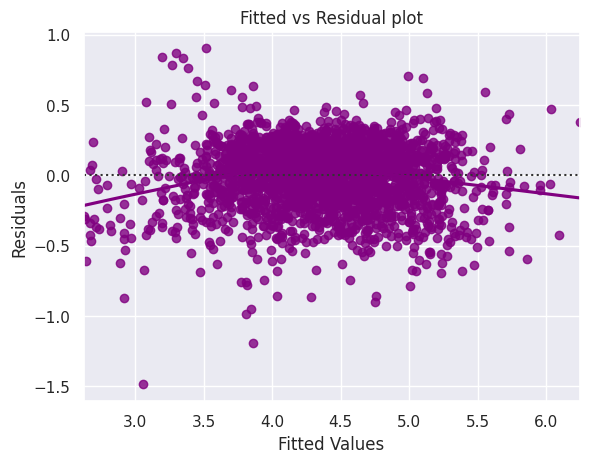

In [ ]:
# let's plot the fitted values vs residuals

sns.residplot(
    data=df_pred, x="Fitted Values", y="Residuals", color="purple", lowess=True
)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Fitted vs Residual plot")
plt.show()

* The scatter plot shows the distribution of residuals (errors) vs fitted values (predicted values).

* If there exist any pattern in this plot, we consider it as signs of non-linearity in the data and a pattern means that the model doesn't capture non-linear effects.

* We see no pattern in the plot above. Hence, the assumptions of linearity and independence are satisfied.

#Test for Normality
* The shape of the histogram of residuals can give an initial idea about the normality.
* It can also be checked via a Q-Q plot of residuals. If the residuals follow a normal distribution, they will make a straight line plot, otherwise not.
* Other tests to check for normality includes the Shapiro-Wilk test.
    - Null hypothesis: Residuals are normally distributed
    - Alternate hypothesis: Residuals are not normally distributed

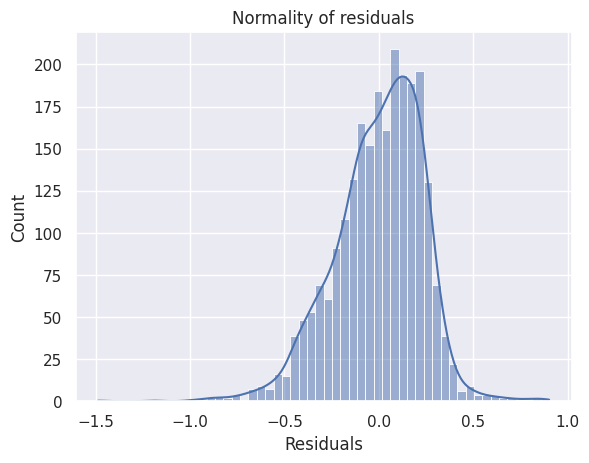

In [ ]:
sns.histplot(data=df_pred, x="Residuals", kde=True)
plt.title("Normality of residuals")
plt.show()

- The histogram of residuals does have a bell shape.
- Let's check the Q-Q plot.

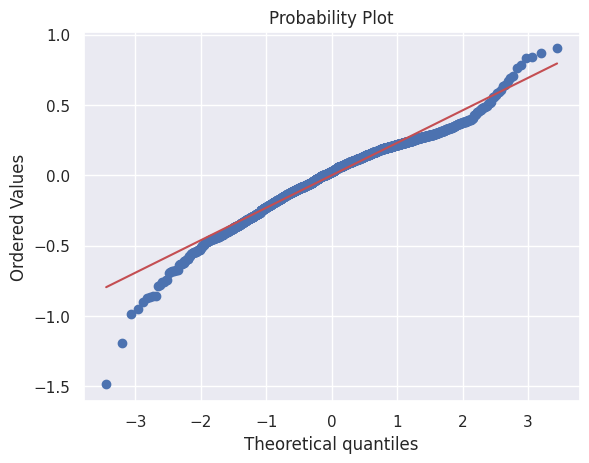

In [ ]:
import pylab
import scipy.stats as stats

stats.probplot(df_pred["Residuals"], dist="norm", plot=pylab)
plt.show()

- The residuals more or less follow a straight line except for the tails.
- Let's check the results of the Shapiro-Wilk test.

In [ ]:
stats.shapiro(df_pred["Residuals"])

ShapiroResult(statistic=np.float64(0.9724019647308448), pvalue=np.float64(3.462926954250742e-21))

- Since p-value < 0.05, the residuals are not normal as per the Shapiro-Wilk test.
- Strictly speaking, the residuals are not normal.
- However, as an approximation, we can accept this distribution as close to being normal.
- **So, the assumption is satisfied.**


# Test For Homoscedasticity
* The residual vs fitted values plot can be looked at to check for homoscedasticity. In the case of heteroscedasticity, the residuals can form an arrow shape or any other non-symmetrical shape.
* The goldfeldquandt test can also be used. If we get a p-value > 0.05 we can say that the residuals are homoscedastic. Otherwise, they are heteroscedastic.
    - Null hypothesis: Residuals are homoscedastic
    - Alternate hypothesis: Residuals have heteroscedasticity


In [ ]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

name = ["F statistic", "p-value"]
test = sms.het_goldfeldquandt(df_pred["Residuals"], x_train3)
lzip(name, test)

[('F statistic', np.float64(1.0554902509992026)),
 ('p-value', np.float64(0.1752049183299785))]

**Since p-value > 0.05, we can say that the residuals are homoscedastic. So, this assumption is satisfied.**

## Final Model

In [ ]:
x_train_final = x_train3.copy()
x_test_final = x_test3.copy()

In [ ]:
olsmodel_final = sm.OLS(y_train, x_train_final).fit()
print(olsmodel_final.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.839
Model:                               OLS   Adj. R-squared:                  0.839
Method:                    Least Squares   F-statistic:                     1142.
Date:                   Mon, 14 Apr 2025   Prob (F-statistic):               0.00
Time:                           00:31:07   Log-Likelihood:                 81.071
No. Observations:                   2417   AIC:                            -138.1
Df Residuals:                       2405   BIC:                            -68.66
Df Model:                             11                                         
Covariance Type:               nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
co

In [ ]:
# predictions on the test set
pred = olsmod2.predict(x_test_final)

df_pred_test = pd.DataFrame({"Actual": y_test, "Predicted": pred})
df_pred_test.sample(10, random_state=1)

Actual  Predicted
1995  4.566741   4.370046
2341  3.696103   3.954403
1913  3.592093   3.760742
688   4.306495   4.099280
650   4.522115   5.117977
2291  4.259294   4.392088
40    4.997685   5.404365
1884  3.875359   4.103732
2538  4.206631   4.044604
45    5.380450   5.301336

* We can observe here that our model has returned pretty good prediction results, and the actual and predicted values are comparable

In [ ]:
# checking model performance on train set (seen 70% data)
print("Training Performance\n")
olsmodel_final_train_perf = model_performance_regression(
    olsmodel_final, x_train_final, y_train
)
olsmodel_final_train_perf

Training Performance



RMSE       MAE  R-squared  Adj. R-squared      MAPE
0  0.233989  0.183177   0.839296        0.838494  4.392265

In [ ]:
# checking model performance on test set (seen 30% data)
print("Test Performance\n")
olsmodel_final_test_perf = model_performance_regression(
    olsmodel_final, x_test_final, y_test
)
olsmodel_final_test_perf

Test Performance



RMSE    MAE  R-squared  Adj. R-squared      MAPE
0  0.238554  0.185    0.84222        0.840371  4.500963

* The model is able to explain ~84% of the variation in the data

* The train and test RMSE and MAE are low and comparable. So, our model is not suffering from overfitting

* The MAPE on the test set suggests we can predict within 4.5% of used cell phone price.

* Hence, we can conclude the model *olsmodel_final* is good for prediction as well as inference purposes

## Actionable Insights and Recommendations

* The model is able to explain ~84% of the variation in the data within 4.5% of the used cell phone price on the test data, which indicates that the model is good for prediction as well as inference purposes
* If the screen size of cell phone increases by one unit, then its price increases by 0.0433 units when all other variables held constant. So selling an used cell phone or tablet with a bigger screen would probably be profitable.
* If the price of new price increases by one unit, then udsed phone price will increases by 0.4282 units, all other variables held constant
* If the phone supports 4G network, phone price will also increases.
* Screen size, camera, ram, normalized new price, some brands, and 4G are possitive coefficient. if these features increase, the price of used devices also increases.
* Lenovo, Nokia, Xiaomi brands have positive coefficients so they can maximize revenue.
* Battery and weight of cell phone dosen't not influenced to prdict the price of a cell phone so company need not be concerned too much about these aspects.

-


___